# **Índice**

>[Índice](#scrollTo=Yd3rVnRlgEAo)

>[1.Contextualización del juego de datos y negocio](#scrollTo=TbDOL6DGgVrF)

>>[1.1. Análisis exploratorio del juego de datos](#scrollTo=qqwTY2mOw8_n)

>>>[Descripción de variables](#scrollTo=cUNcFj4SG68q)

>>>[Comprobación de registros](#scrollTo=mdcp02U88rs4)

>>>[Comprobación de duplicados](#scrollTo=lyOrD_Hh-Dqs)

>>>[Comprobación de valores nulos](#scrollTo=7GqV45wMAOsG)

>>>[Tipos de datos de las variables](#scrollTo=6YrHJZiQReD5)

>>>[Selección de variables relevantes para el negocio](#scrollTo=1N1ABURn691V)

>>>[Detección de valores anómalos, de calidad baja o que haya que recodificar](#scrollTo=NOiUMu8RBo4V)

>>>[Revisión y reorganización de formatos de datos](#scrollTo=i0LmH3lBMO1z)

>>>[¿Datos suficientes o necesitamos fuentes adicionales?](#scrollTo=n3e2VJrPKXQ6)

>>[1.2. Conexión de los datos con proceso de negocio](#scrollTo=atmUNkuyGaEY)

>>>[Descripción](#scrollTo=QfuPDMTc2Orc)

>>>[Tipo de tabla de hecho](#scrollTo=NUGXC8GI4Dzh)

>>>[Granularidad](#scrollTo=3hpjfGmm2hNY)

>>>[Tasa de refresco](#scrollTo=tQUxZMcp4ELZ)

>>>[Medidas](#scrollTo=7WIou-VF4UIl)

>>>[Dimensiones](#scrollTo=EkmEftaC4d_h)

>>>[Hecho](#scrollTo=deFdhQAy_MiK)

>>>[Tabla de Hechos](#scrollTo=MOdqszZLTAcy)

>>[1.3. Limpieza y pre-procesado de los datos](#scrollTo=0fJHYuRXxf3z)

>>>[Eliminación de columnas](#scrollTo=gXonYafLyLnc)

>>>[Manejo valores faltantes](#scrollTo=ACk9mxpcJWWV)

>>>[Manejo valores anómalos](#scrollTo=Ed_F9Lq5XQQr)

>>>[Normalización de los datos](#scrollTo=jrC_5eYyOX8i)

>>>[Conversión de tipos de datos](#scrollTo=RmJl3gumQoyO)

>>[2. Cuadro de mando](#scrollTo=LCOT4xdGyraB)



# 1.Contextualización del juego de datos y negocio




El dataset proporcionado contiene información sobre los 10.000 libros extraídos de la lista "[Best Books Ever](https://www.goodreads.com/list/show/1.Best_Books_Ever)" de la plataforma Goodreads.

> **Goodreads** es una red social o comunidad virtual para lectores que permite compartir opiniones sobre libros, participar en clubes de lectura y recibir recomendaciones.

Para analizar el dataset, primero hay que importar las librerías, subir el dataset y leer el fichero.

In [2]:
%%bash
FILE=goodreads_books_red.csv
wget -O $FILE https://umubox.um.es/index.php/s/wbXmOB5OVLI7Juw/download

--2025-12-17 10:42:20--  https://umubox.um.es/index.php/s/wbXmOB5OVLI7Juw/download
Resolving umubox.um.es (umubox.um.es)... 155.54.212.96, 2001:720:1710:212::1:b
Connecting to umubox.um.es (umubox.um.es)|155.54.212.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19960710 (19M) [text/csv]
Saving to: ‘goodreads_books_red.csv’

     0K .......... .......... .......... .......... ..........  0% 19.7M 1s
    50K .......... .......... .......... .......... ..........  0%  139K 70s
   100K .......... .......... .......... .......... ..........  0%  261K 71s
   150K .......... .......... .......... .......... ..........  1%  877K 59s
   200K .......... .......... .......... .......... ..........  1%  500K 55s
   250K .......... .......... .......... .......... ..........  1%  964K 49s
   300K .......... .......... .......... .......... ..........  1% 2.00M 43s
   350K .......... .......... .......... .......... ..........  2% 1.90M 39s
   400K .......... ..........

In [3]:
#Importamos las librerías que necesitamos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [4]:
#Leemos el dataset
libros = pd.read_csv("goodreads_books_red.csv", sep=",")
libros

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,10182392,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1",https://www.goodreads.com//book/show/10182392-...,(Fullmetal Alchemist: Omnibus #1),https://i.gr-assets.com/images/S/compressed.ph...,"Hiromu Arakawa, Akira Watanabe",https://www.goodreads.com/author/show/4698899....,6033,292,4.60,...,9781421540184,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/1?...,https://www.goodreads.com//book_link/follow/8?...,"502101, 502101, 20318855, 10225194, 10189594, ...","9889765, 10129843, 16117425, 16146013, 1757138...",Breaking the laws of nature is a serious crime...
1,9783248,ÎÎ¹ Î­Î¼ÏÎ¿ÏÎ¿Î¹ ÏÏÎ½ ÎµÎ¸Î½ÏÎ½,https://www.goodreads.com//book/show/9783248,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Alexandros Papadiamantis, ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï...",https://www.goodreads.com/author/show/5279499....,224,10,4.09,...,9789600510270,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"82531, 82531, 53639, 3064278, 7055559, 6327342...",NaN,Î ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï Î Î±ÏÎ±Î´Î¹Î±Î¼Î¬Î½Ï...
2,9861455,The Return of The Soldier,https://www.goodreads.com//book/show/9861455-t...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Rebecca West, Sadie Jones",https://www.goodreads.com/author/show/8111.Reb...,5274,613,3.70,...,9781844086986,NaN,NaN,"Captain Chris Baldry, Kitty Baldry, Jenny",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"375277, 375277, 1983755, 1280771, 1022957, 319...",NaN,This is a masterful novel about a shell-shocke...
3,50684,The Black Unicorn: Poems,https://www.goodreads.com//book/show/50684.The...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Audre Lorde,https://www.goodreads.com/author/show/18486.Au...,1594,122,4.34,...,9780393312379,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"380188, 380188, 32956, 13429607, 364141, 20702...",NaN,"Rich continues: ""Refusing to be circumscribed ..."
4,2443,The Innocents Abroad,https://www.goodreads.com//book/show/2443.The_...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Mark Twain, Grover Gardner",https://www.goodreads.com/author/show/1244.Mar...,11056,941,3.86,...,9780812967050,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1318174, 1318174, 15383304, 11393693, 22557270...",NaN,"The Innocents Abroad, or The New Pilgrims' Pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,98685,Genius: The Life and Science of Richard Feynman,https://www.goodreads.com//book/show/98685.Genius,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"James Gleick, Richard P. Feynman",https://www.goodreads.com/author/show/10401.Ja...,19956,459,4.15,...,9780679747048,NaN,NaN,Richard Feynman,Pulitzer Prize Nominee for Biography or Autobi...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"56167, 56167, 35167685, 6996, 6629359, 8586536...",NaN,An illuminating portrayal of Richard Feynmanâ...
9996,35512560,The Diary of a Bookseller,https://www.goodreads.com//book/show/35512560-...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Shaun Bythell,https://www.goodreads.com/author/show/16979140...,13618,2464,3.79,...,9781781258620,NaN,"Wigtown, Galloway, Scotland,2014",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"17164630, 17164630, 20681099, 20631808, 285014...",NaN,"Shaun Bythell owns The Bookshop, Wigtown - Sco..."
9997,22561642,I'm Not Over You!,https://www.goodreads.com//book/show/22561642-...,NaN,https://i.gr-assets.com/imag

Observamos que se muestra un mensaje de warning **"Warning: Total number of columns (31) exceeds max_columns (20). Falling back to pandas display."**. Eso significa si usamos  Así que usamos método `set_option` de pandas para mostrar más de 20 columnas.

**Antes:**
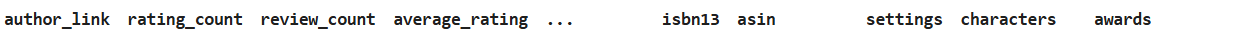
**Después:**
image.png

In [5]:
pd.set_option("display.max_columns", 35)

#Observamos las 10 primeras filas usando .head()
libros.head(10)

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,10182392,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1",https://www.goodreads.com//book/show/10182392-...,(Fullmetal Alchemist: Omnibus #1),https://i.gr-assets.com/images/S/compressed.ph...,"Hiromu Arakawa, Akira Watanabe",https://www.goodreads.com/author/show/4698899....,6033,292,4.60,4229,1330,361,62,51,576.0,2002,VIZ Media LLC,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1","Sequential Art-Manga 501, Fantasy 105, Sequent...",1421540185,9781421540184,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/1?...,https://www.goodreads.com//book_link/follow/8?...,"502101, 502101, 20318855, 10225194, 10189594, ...","9889765, 10129843, 16117425, 16146013, 1757138...",Breaking the laws of nature is a serious crime...
1,9783248,ÎÎ¹ Î­Î¼ÏÎ¿ÏÎ¿Î¹ ÏÏÎ½ ÎµÎ¸Î½ÏÎ½,https://www.goodreads.com//book/show/9783248,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Alexandros Papadiamantis, ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï...",https://www.goodreads.com/author/show/5279499....,224,10,4.09,81,93,42,5,3,391.0,1882,ÎÎ¹Î²Î»Î¹Î¿ÏÏÎ»ÎµÎ¯Î¿Î½ ÏÎ·Ï ÎÏÏÎ¯Î±Ï,ÎÎ¹ Î­Î¼ÏÎ¿ÏÎ¿Î¹ ÏÏÎ½ ÎµÎ¸Î½ÏÎ½,Historical-Historical Fiction 3,960051027X,9789600510270,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"82531, 82531, 53639, 3064278, 7055559, 6327342...",NaN,Î ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï Î Î±ÏÎ±Î´Î¹Î±Î¼Î¬Î½Ï...
2,9861455,The Return of The Soldier,https://www.goodreads.com//book/show/9861455-t...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Rebecca West, Sadie Jones",https://www.goodreads.com/author/show/8111.Reb...,5274,613,3.70,1121,2053,1583,435,82,160.0,1918,Virago,The Return of the Soldier,"Classics 245, Fiction 234, Historical-Historic...",1844086984,9781844086986,NaN,NaN,"Captain Chris Baldry, Kitty Baldry, Jenny",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"375277, 375277, 1983755, 1280771, 1022957, 319...",NaN,This is a masterful novel about a shell-shocke...
3,50684,The Black Unicorn: Poems,https://www.goodreads.com//book/show/50684.The...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Audre Lorde,https://www.goodreads.com/author/show/18486.Au...,1594,122,4.34,845,515,179,43,12,136.0,1978,W. W. Norton Company,The Black Unicorn: Poems,"Poetry 605, Feminism 60, LGBT 33, Race 17, GLB...",0393312372,9780393312379,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"380188, 380188, 32956, 13429607, 364141, 20702...",NaN,"Rich continues: ""Refusing to be circumscribed ..."
4,2443,The Innocents Abroad,https://www.goodreads.com//book/show/2443.The_...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Mark Twain, Grover Gardner",https://www.goodreads.com/author/show/1244.Mar...,11056,941,3.86,3191,4256,2714,675,220,560.0,1869,Modern Library,NaN,"Travel 448, Classics 437, Nonfiction 253, Humo...",0812967054,9780812967050,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1318174, 1318174, 15383304, 11393693, 22557270...",NaN,"The Innocents Abroad, or The New Pilgrims' Pro..."
5,1705697,Wastelands: Stories of the Apocalypse (Wastela...,https://www.goodreads.com//book/show/1705697.W...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"John Joseph Adams, Cory Doctorow, George R.R. ...",https://www.goodreads.com/author/show/1161372....,9064,777,3.77,2126,3577,2663,560,138,333.0,December 25th 2007,Night Shade,Wastelands: Stories of the Apocalypse,"Short Stories 325, Science Fiction 305, Apocal...

Observamos que cada fila representa un libro individual, mientras que las columnas recogen diversas variables que aportan información identificativa (identificador único del libro, título, autor, isbn, etc...), de enlace(enlace, enlace a portada, worldcat_redirect_link, etc...) , de contenido (descripción, personajes, settings, etc...), de valoración (número total de valoraciones, cantidad de reseñas recibidas, valoración promedio otorgada, etc...) y información complementaria (premios y reconocimientos recibidos, libros recomendados, etc...)

También, observamos que el dataset necesita una limpieza y pre-procesado de los datos. Y para un análisis de datos desde el punto de vista de negocio necesitamos descartar algunas variables.

## **1.1. Análisis exploratorio del juego de datos**

En el apartado **"1. Contextualización del juego de datos y del negocio"** ya se identificó que el dataset contiene 31 columnas. A continuación, se realiza un análisis variable por variable para comprender el significado de cada una dentro del dataset.

### **Descripción de variables**

Las columnas del dataset son `id`, `title`, `link`, `series`, `cover_link`, `author`, `author_link`, `rating_count`, `review_count`, `average_rating`, `five_star_ratings`, `four_star_ratings`, `three_star_ratings`, `two_star_ratings`, `one_star_ratings`, `number_of_pages`, `date_published`, `publisher`, `original_title`, `genre_and_votes`, `isbn`, `isbn13`, `asin`, `settings`, `characters`, `awards`, `amazon_redirect_link`, `worldcat_redirect_link`, `recommended_books`, `books_in_series` y `description`

De acuerdo con las columnas identificadas, podemos clasificarlas en las siguientes categorías: variables de identificación, variables de enlace, variables bibliográficas (que ofrecen información sobre el libro), variables de contenido, variables de métricas de valoración, y variables de información complementaria.

**Variables de identificación**

*   **`id`** : Identificador único asignado por Goodreads a cada libro
*   **`isbn`**: International Standard Book Number (formato antiguo de 10 dígitos)
*   **`isbn13`**:  International Standard Book Number (formato nuevo de 13 dígitos)
*   **`asin`**: Amazon Standard Identification Number




**Variables de enlace**

*   **`link`**: URL que dirige a la página del libro en Goodreads
*   **`cover_link`**: URL de la imagen de portada del libro
*   **`author_link`**: URL a la página del autor en Goodreads
*   **`amazon_redirect_link`**: URL para comprar el libro en Amazon
*   **`worldcat_redirect_link`**: URL a la página del libro en WorldCat (catálogo mundial de bibliotecas)







**Variables bibliográficas**

*   **`title`**: Título del libro
*   **`author`**: Nombre del autor o autores del libro
*   **`original_title`**: Título original del libro
*   **`number_of_pages`**: Número de páginas del libro
*   **`date_published`**: Fecha de publicación del libro
*   **`publisher`**: Editorial que publicó el libro
*   **`series`**:  Indica si el libro forma parte de una serie
*   **`genre_and_votes`**:  Géneros literarios asignados y número de votos para cada género











**Variables de contenido**

*   **`settings`**: Ubicación geográfica/contextos/ambientación donde se desarrolla la historia
*   **`characters`**: Personajes principales que aparecen en el libro
*   **`description`**: Breve sinopsis o descripción del contenido del libro.




**Variables de métricas de valoración**

*   **`average_rating`**: Valoración media obtenida
*   **`rating_count`**: Número total de valoraciones recibidas
*   **`review_count`**: Número total de reseñas escritas por los usuarios.
*   **`five_star_ratings`**: Cantidad de valoraciones de 5 estrellas
*   **`four_star_ratings`**: Cantidad de valoraciones de 4 estrellas
*   **`three_star_ratings`**: Cantidad de valoraciones de 3 estrellas
*   **`two_star_ratings`**: Cantidad de valoraciones de 2 estrellas
*   **`one_star_ratings`**: Cantidad de valoraciones de 1 estrella




**Variables de información complementaria**

*   **`awards`**: Premios literarios recibidos por el libro
*   **`recommended_books`**: Identificadores de los libros recomendados relacionados con este libro
*   **`books_in_series`**: Identificadores de otros libros que forman parte de la misma serie




Vamos a comprobar cuántos registros tenemos utizando método `shape`, si hay duplicados usando `.duplicated()` y si hay valores nulos mediante `.isnull()`.

### **Comprobación de registros**

In [6]:
registros = libros.shape[0]

print(f"Este dataset contiene en total {registros} registros")

Este dataset contiene en total 10000 registros


### **Comprobación de duplicados**

In [7]:
duplicados = libros.duplicated()
duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [8]:
suma_duplicados = duplicados.sum()
print(f"Este dataset contiene {suma_duplicados} registro duplicado")

Este dataset contiene 0 registro duplicado


### **Comprobación de valores nulos**

In [9]:
null_libros = libros.isnull()
null_libros

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,True,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False
9996,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False
9997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,False
9998,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False


Como contiene 10000 registros usamos la agregación .sum() para ver total de valores nulos

In [10]:
print(libros.isnull().sum())

id                           0
title                        0
link                         0
series                    5450
cover_link                 122
author                       0
author_link                  0
rating_count                 0
review_count                 0
average_rating               0
five_star_ratings            0
four_star_ratings            0
three_star_ratings           0
two_star_ratings             0
one_star_ratings             0
number_of_pages            449
date_published             166
publisher                  718
original_title            2460
genre_and_votes            532
isbn                      2338
isbn13                    2470
asin                      8987
settings                  7770
characters                7365
awards                    7980
amazon_redirect_link         0
worldcat_redirect_link     795
recommended_books          750
books_in_series           5687
description                521
dtype: int64


Observamos que las columnas `series`, `cover_link`, `number_of_pages`, `date_published`, `publisher`, `original_title`, `genre_and_votes`, `isbn`, `isbn_13`, `asin`, `settings`, `characters`, `awards`, `world_cat_redirect_link`, `recommended_books`,` books_in_series` y `description` existen valores faltantes. Según cada caso, si es interesante para nuestro negocio, utilizamos **eliminación de la columna por completo**, **eliminación de filas**, **relleno con un valor predefinido**, **usando la moda o la mediana si se trata de una variable numérica** o  **imputación de valores**.

Antes de detectar valores anómalos, de baja calidad o que requieran recodificación, identificaremos los tipos de datos de cada variable y verificaremos si cada columna tiene el tipo de dato adecuado. Además, teniendo en cuenta las descripciones de las variables, los valores nulos ya detectados y los tipos de datos de nuestras variables, evaluaremos qué variables son relevantes para el negocio y decidiremos si nos interesa conservar todas las filas y columnas, o si será necesario descartar algunas.

### **Tipos de datos de las variables**

En [la documentación de pandas](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) , el atributo `dtypes` devuelve una serie con el tipo de dato de cada columna.

In [11]:
libros.dtypes

,0
id,int64
title,object
link,object
series,object
cover_link,object
author,object
author_link,object
rating_count,int64
review_count,int64
average_rating,float64


También, podemos usar esta forma para para comprenderlo mejor.

In [12]:
fila = libros.head(1)
# Iteramos sobre las columnas del DataFrame y los valores de la primera fila simultáneamente
#usando la zip()
for col, valor in zip(libros.columns, libros.values[0]):
    print(f"El valor {str(valor)} de la columna '{col}' es de tipo {str(type(valor))}")

El valor 10182392 de la columna 'id' es de tipo <class 'int'>
El valor Fullmetal Alchemist (3-in-1 Edition), Vol. 1 de la columna 'title' es de tipo <class 'str'>
El valor https://www.goodreads.com//book/show/10182392-fullmetal-alchemist-3-in-1-edition-vol-1 de la columna 'link' es de tipo <class 'str'>
El valor (Fullmetal Alchemist: Omnibus #1) de la columna 'series' es de tipo <class 'str'>
El valor https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1328034783l/10182392.jpg de la columna 'cover_link' es de tipo <class 'str'>
El valor Hiromu Arakawa, Akira Watanabe de la columna 'author' es de tipo <class 'str'>
El valor https://www.goodreads.com/author/show/4698899.Hiromu_Arakawa de la columna 'author_link' es de tipo <class 'str'>
El valor 6033 de la columna 'rating_count' es de tipo <class 'int'>
El valor 292 de la columna 'review_count' es de tipo <class 'int'>
El valor 4.6 de la columna 'average_rating' es de tipo <class 'float'>
El valor 4229 de la columna 'fi

Observamos que las columnas `asin`, `settings`, `characters` y `awards` contienen valores nulos. Vamos a ver otros ejemplos.

In [13]:
fila = libros.head(45)
# Iteramos sobre las columnas del DataFrame y los valores de la primera fila simultáneamente
#usando la zip()
for col, valor in zip(libros.columns, libros.values[44]):
    print(f"El valor {str(valor)} de la columna '{col}' es de tipo {str(type(valor))}")

El valor 13438524 de la columna 'id' es de tipo <class 'int'>
El valor Flight Behavior de la columna 'title' es de tipo <class 'str'>
El valor https://www.goodreads.com//book/show/13438524-flight-behavior de la columna 'link' es de tipo <class 'str'>
El valor nan de la columna 'series' es de tipo <class 'float'>
El valor https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1352212134l/13438524.jpg de la columna 'cover_link' es de tipo <class 'str'>
El valor Barbara Kingsolver de la columna 'author' es de tipo <class 'str'>
El valor https://www.goodreads.com/author/show/3541.Barbara_Kingsolver de la columna 'author_link' es de tipo <class 'str'>
El valor 80174 de la columna 'rating_count' es de tipo <class 'int'>
El valor 9874 de la columna 'review_count' es de tipo <class 'int'>
El valor 3.79 de la columna 'average_rating' es de tipo <class 'float'>
El valor 20717 de la columna 'five_star_ratings' es de tipo <class 'int'>
El valor 31518 de la columna 'four_star_ratings

In [14]:
fila = libros.head(25)
# Iteramos sobre las columnas del DataFrame y los valores de la primera fila simultáneamente
#usando la zip()
for col, valor in zip(libros.columns, libros.values[18]):
    print(f"El valor {str(valor)} de la columna '{col}' es de tipo {str(type(valor))}")

El valor 18957343 de la columna 'id' es de tipo <class 'int'>
El valor On the Use and Abuse of History for Life de la columna 'title' es de tipo <class 'str'>
El valor https://www.goodreads.com//book/show/18957343-on-the-use-and-abuse-of-history-for-life de la columna 'link' es de tipo <class 'str'>
El valor nan de la columna 'series' es de tipo <class 'float'>
El valor https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1385450228l/18957343.jpg de la columna 'cover_link' es de tipo <class 'str'>
El valor Friedrich Nietzsche de la columna 'author' es de tipo <class 'str'>
El valor https://www.goodreads.com/author/show/1938.Friedrich_Nietzsche de la columna 'author_link' es de tipo <class 'str'>
El valor 1715 de la columna 'rating_count' es de tipo <class 'int'>
El valor 87 de la columna 'review_count' es de tipo <class 'int'>
El valor 3.96 de la columna 'average_rating' es de tipo <class 'float'>
El valor 593 de la columna 'five_star_ratings' es de tipo <class 'int'>


Según los resultados obtenidos, podemos decir que la mayoría de los datos de los variables están en formato correcto y que la mayoría de las columnas tiene el tipo de dato adecuado.

**Columnas con sus tipos de datos adecuados:**

<table>
  <tr>
    <th>Columna</th>
    <th>Tipo de dato</th>
  </tr>
  <tr>
    <td>id</td>
    <td>int</td>
  </tr>
  <tr>
    <td>title</td>
    <td>str</td>
  </tr>
  <tr>
    <td>link</td>
    <td>str</td>
  </tr>
  <tr>
    <td>series</td>
    <td>str</td>
  </tr>
  <tr>
    <td>cover_link</td>
    <td>str</td>
  </tr>
  <tr>
    <td>author_link</td>
    <td>str</td>
  </tr>
  <tr>
    <td>rating_count</td>
    <td>int</td>
  </tr>
  <tr>
    <td>review_count</td>
    <td>int</td>
  </tr>
  <tr>
    <td>average_rating</td>
    <td>float</td>
  </tr>
  <tr>
    <td>five_star_ratings</td>
    <td>int</td>
  </tr>
  <tr>
    <td>four_star_ratings</td>
    <td>int</td>
  </tr>
  <tr>
    <td>three_star_ratings</td>
    <td>int</td>
  </tr>
  <tr>
    <td>two_star_ratings</td>
    <td>int</td>
  </tr>
  <tr>
    <td>one_star_ratings</td>
    <td>int</td>
  </tr>
  <tr>
    <td>publisher</td>
    <td>str</td>
  </tr>
  <tr>
    <td>original_title</td>
    <td>str</td>
  </tr>
  <tr>
    <td>isbn</td>
    <td>str</td>
  </tr>
  <tr>
    <td>isbn13</td>
    <td>str</td>
  </tr>
  <tr>
    <td>asin</td>
    <td>str</td>
  </tr>
  <tr>
    <td>amazon_redirect_link</td>
    <td>str</td>
  </tr>
  <tr>
    <td>worldcat_redirect_link</td>
    <td>str</td>
  </tr>
  <tr>
    <td>description</td>
    <td>str</td>
  </tr>


Las columnas `isbn`, `isbn13`, `recommended_books` y `books_in_series` son de tipo `string` porque se trata de identificadores.

Hay columnas que, aunque tienen tipos de datos correctos, requieren un tratamiento adicional para poder analizarlas correctamente:

* La columna `author` es de tipo *string* pero es un campo multivalor, es decir, un libro puede tener más de un autor.  Si queremos realizar análisis sobre los autores de los libros, tenemos que gestionarlo adecuadamente. Por ejemplo, podemos convertirla en una lista o separar los autores en filas distintas.
* La columna `awards` también es de tipo *string* en el DataFrame. Al igual que ocurre con las columnas `author`, `genre_and_votes`, entre otras, es un campo que puede contener múltiples valores. Por lo tanto, si queremos realizar análisis sobre esta columna, debemos tratarla de manera apropiada como convertirla en una lista.
* La columna `genre_and_votes` es de tipo *string* en el DataFrame, pero es un campo multivalor. Así que la dividimos en dos columnas: `genre` y `votes`, y convertimos sus contenidos en listas de valores.
*   Las columnas `settings`, `characters`, `recommended_books` y `books_in_series (otros libros que forman parte de la misma serie)`  son de tipo *string*, y ocurre lo mismo que con la columna `author`; es decir, son campos que pueden contener múltiples valores. Por lo tanto, si queremos realizar análisis sobre estos datos,tenemos que tratarlos de manera apropiada.





**Columnas con sus tipos de datos inadecuados:**
<table>
  <tr>
    <th>Columna</th>
    <th>Tipo de dato inadecuado</th>
    <th>Tipo de dato adeucado</th>
  </tr>
  <tr>
    <td>number_of_pages</td>
    <td>float</td>
    <td>int</td>
  </tr>
  <tr>
    <td>date_published</td>
    <td>str</td>
    <td>datetime</td>
  </tr>

* La columna `number_of_pages` contiene números enteros por lo tanto, debe ser de tipo *int* en lugar de *float*.
* La columna `date_published` es de tipo *string*, lo cual no es correcto, ya que representa **fecha**. Además, los valores están en un formato inconsistente —por ejemplo, "April 1st 1874"—, por lo que es necesario normalizarla y convertirla a tipo *datetime*. Sin embargo, si solo extraemos el **año** solo necesitamos convertirla en *int*.


### **Selección de variables relevantes para el negocio**

De acuerdo con la sección "[descripción de variables](#scrollTo=cUNcFj4SG68q)", los [valores nulos detectados](#scrollTo=7GqV45wMAOsG) , los [tipos de datos de las variables identificados](#scrollTo=6YrHJZiQReD5) y la relevancia de las variables para el análisis en nuestro negocio, podemos descartar aquellas columnas que no aportan valor a nuestro análisis:
*   `id`, `isbn`, `isbn13` y `asin` : son variables que identifican de forma única los libros, pero no son relevantes para realizar análisis.
*   `link`, `cover_link`, `author_link`, `amazon_redirect_link` y `worldcat_redirect_link` : son variables que almacenan URLs, las cuales no aportan información útil para el análisis ni permiten extraer métricas.
- `number_of_pages`: La variable `number_of_pages `representa el número de páginas de un libro físico. Sin embargo, en el dataset se incluyen también audiolibros o versiones en audio CD, como por ejemplo *Dead Man's Folly* de Agatha Christie, narrado por David Suchet, que figura con solo 6 páginas. Por lo tanto, es más adecuado descartar esta variable.
*   `original_title` : La variable `original_title` nos lleva a pensar que contiene los títulos originales de los libros; sin embargo, los valores están en inglés, por lo que esta columna duplica la información de `title`. Además, presenta 2.460 valores faltantes, lo que representa un 24,6% del total de registros, lo que indica que se trata de una columna con datos de baja calidad.
*   `settings`, `characters` y `description` : son de tipo string y difíciles de analizar cuantitativamente. En la variable `description` ontiene texto extenso con comas y signos de puntuación que pueden generar problemas al procesar los datos. Estas variables requieren técnicas de procesamiento de lenguaje natural (NLP) para ser analizadas adecuadamente.
*   `recommended_books`, `books_in_series` : podrían parecer útiles, pero en realidad solo contienen identificadores de *Goodreads* que no aportan valor relevante para el análisis.


**Las columnas conservadas son:**
- **Variables bibliográficas**:
  *   `title`: Es de tipo string, pero debe ser recodificado porque contiene registros con caracteres especiales.
  *   `author`: Es un campo multivalor, por lo que debe ser gestionada adecuadamente. Puede transformarse en una *lista*, separarse en múltiples columnas (menos flexible) o dividirse en múltiples filas (una por cada autor y libro). En este caso, optamos por transformarla en una *lista*.
  * `date_published` : Es de tipo string y debe ser convertido a *datetime* y normalizado. Sin embargo, debido a que en muchos casos la informaciónn de mes y de día no está disponible, se ha optado por extraer únicamente el año como dato temporal principal que sería un tipo *int*. Y se cambiará el nombre de columna a `year_published`. Además, se eliminarán las filas que contienen valores nulos (1.66% del total).
  * `publisher`: Se sustituirá los valores faltantes por la cadena "**Unknown**".
  * `series` : Se sustituirá los valores faltantes por la cadena "**Standalone**" (Independiente).
  * `genre_and_votes` : Se transformará en dos columnas: una que contendrá el género del libro y otra que almacenará el número de votos. Al ser un campo multivalor, es necesario manejarlo adecuadamente;en este caso, transformamos en lista de género y votos. Y se sustituirá los valores nulos por "**No genre 0**" que significa sin género y 0 voto.
- **Variables de métricas de valoración**:
  *   `average_rating`
  *   `rating_count`
  *   `review_count`
  *   `five_star_ratings`
  *   `four_star_ratings`
  *   `three_star_ratings`
  *   `two_star_ratings`
  *   `one_star_ratings`
- **Variables de información complementaria**:
  *   `awards`: Es un campo multivalor. En este caso, se transformará en una *lista* y, para manejar los valores nulos, los sustituiremos por la cadena "**No awards**" (No premiado).

### **Detección de valores anómalos, de calidad baja o que haya que recodificar**

**Variables númericas**

Verificamos primero las variables númericas:
*   `average_rating`
*   `rating_count`
*   `review_count`
*   `five_star_ratings`
*   `four_star_ratings`
*   `three_star_ratings`
*   `two_star_ratings`
*   `one_star_ratings`


Vamos a obtener un resumen estadístico de las variables numéricas utilizando .describe().

In [15]:
#Usamos .describe() para obtener un resumen estadístico
libros[["average_rating", "rating_count", "review_count",
    "five_star_ratings", "four_star_ratings", "three_star_ratings",
    "two_star_ratings", "one_star_ratings"]].describe()


,average_rating,rating_count,review_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
count,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.0000
mean,4.022116,1.873708e+04,979.443700,7.898113e+03,6.171455e+03,3377.901000,899.852400,389.7568
std,0.365929,1.216873e+05,3887.537461,6.767876e+04,3.437825e+04,16903.873928,5000.086742,2783.5651
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0000
25%,3.820000,3.380000e+02,31.000000,1.140000e+02,1.057500e+02,61.000000,15.000000,5.0000
50%,4.030000,2.310000e+03,165.000000,8.040000e+02,7.770000e+02,463.500000,107.000000,36.0000
75%,4.220000,9.365250e+03,629.000000,3.360500e+03,3.188000e+03,1860.250000,445.000000,153.2500
max,5.000000,6.801077e+06,154147.000000,4.414877e+06,1.557858e+06,582217.000000,188061.000000,119032.0000


Observamos que los números grandes se muestran automáticamente en notación científica, por lo que utilizamos *display.float_format* (Fuente: [stackoverflow](https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results)) para suprimirla.

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [17]:
libros[["average_rating", "rating_count", "review_count",
    "five_star_ratings", "four_star_ratings", "three_star_ratings",
    "two_star_ratings", "one_star_ratings"]].describe()

,average_rating,rating_count,review_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4.02,18737.08,979.44,7898.11,6171.46,3377.90,899.85,389.76
std,0.37,121687.28,3887.54,67678.76,34378.25,16903.87,5000.09,2783.57
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.82,338.00,31.00,114.00,105.75,61.00,15.00,5.00
50%,4.03,2310.00,165.00,804.00,777.00,463.50,107.00,36.00
75%,4.22,9365.25,629.00,3360.50,3188.00,1860.25,445.00,153.25
max,5.00,6801077.00,154147.00,4414877.00,1557858.00,582217.00,188061.00,119032.00


Observamos que el valor mínimo (min) es 0, lo que podría indicar que los libros aún no han sido valorados. Verificaremos si ese es el caso o no.

In [18]:
libros[libros["rating_count"] == 0][["title","author", "average_rating","rating_count",	"review_count"]]

,title,author,average_rating,rating_count,review_count
938,The Rising Tide,Nathan Preedy,0.00,0,0
1430,Adventures of Love: Games of Love 1,Gideon Cecil,0.00,0,0
2728,Heitere Verse - Von Menschen und Unmenschen,Eugen Roth,0.00,0,0
3156,"Castle Stories (Poetry, #3)",Vanessa M. Chattman,0.00,0,0
4850,Thumbwars,Sam Nortey Jr.,0.00,0,0
5852,"Phonological Representations: Their Names, For...",John Coleman,0.00,0,0
6152,Destiny,Michele Scalini,0.00,0,0
6199,Donald Duck Comics: Donald Duck Comics by Carl...,Source Wikipedia,0.00,0,0
7311,"Six-Pack Abs: A Quick, Concise Guide To Obtain...",D. Terry,0.00,0,0
7601,Narcissus and the Dragon Birth,L'Poni Baldwin,0.00,0,0


In [19]:
num_libros_sin_valoracion = len(libros[libros["average_rating"] == 0][["title", "author", "average_rating", "rating_count", "review_count"]])
print(f"Libros sin valoraciones: {num_libros_sin_valoracion}")

Libros sin valoraciones: 13


El resultado confirma que efectivamente es este el caso.

En `rating_count` y `review_count` observamos una dispersión muy alta. `rating_count` tiene una desviación estándar de 121.687,28, con una media de 18.737,08, una mediana de 2.310,00 y un valor máximo de 6.801.077,00. Por su parte, `review_count` presenta una desviación estándar de 3.887,54, una media de 979,44, una mediana de 165,00 y un máximo de 154.147,00.
Esta diferencia entre la media y la mediana, así como los valores máximos, podría deberse a libros muy populares, por lo que no necesariamente son valores atípicos. Sin embargo, es necesario comprobarlo.

In [20]:
top_rating = libros.sort_values(by="rating_count", ascending=False)[["title", "author", "rating_count"]].head(10)
top_rating

,title,author,rating_count
976,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Olly Moss",6801077
1776,The Fault in Our Stars,John Green,3442749
9766,Pride and Prejudice,"Jane Austen, Anna Quindlen",2891405
1429,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2804745
5804,Harry Potter and the Deathly Hallows,J.K. Rowling,2714649
1911,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling, Mary GrandPrÃ©",2688173
7512,Animal Farm,"George Orwell, Russell Baker, C.M. Woodhouse",2636504
1689,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPrÃ©",2417954
6423,The Girl on the Train,Paula Hawkins,2019450
1227,Memoirs of a Geisha,Arthur Golden,1682589


In [21]:
top_review = libros.sort_values(by="review_count", ascending=False)[["title", "author", "review_count"]].head(10)
top_review

,title,author,review_count
1776,The Fault in Our Stars,John Green,154147
6423,The Girl on the Train,Paula Hawkins,108895
976,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Olly Moss",108483
8928,Wonder,"R.J. Palacio, Raquel Jaramillo",64971
9766,Pride and Prejudice,"Jane Austen, Anna Quindlen",64061
3053,Harry Potter and the Cursed Child: Parts One a...,"John Tiffany, Jack Thorne, J.K. Rowling",63912
5804,Harry Potter and the Deathly Hallows,J.K. Rowling,63495
6898,Looking for Alaska,John Green,55284
7512,Animal Farm,"George Orwell, Russell Baker, C.M. Woodhouse",53251
1911,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling, Mary GrandPrÃ©",53061


Los resultados muestran que no se trata de valores anómalos, sino de libros *bestsellers*. Es interesante analizar en qué libros disminuyen las valoraciones o las reseñas.

**`rating_count`**

In [22]:
# Creamos categorías por número de valoraciones
def clasificar_popularidad(x):
    if x >= 5000000:
        return "+5M valoraciones"
    elif x >= 1000000:
        return "1M–5M"
    elif x >= 500000:
        return "500k–999k"
    elif x >= 100000:
        return "100k–499k"
    elif x >= 10000:
        return "10k–99k"
    elif x >= 1000:
      return "1k–9.9k"
    elif x >= 100:
      return "100–999"
    elif x > 0:
      return "1–99"
    else:
        return "Sin valoraciones"

libros["popularidad_rating"] = libros["rating_count"].apply(clasificar_popularidad)

# Contamos cuántos libros hay por categoría
bestseller_rating = libros["popularidad_rating"].value_counts()

#Lista personalizada para el orden de las categorías
orden_popularidad_rating = ["+5M valoraciones", "1M–5M", "500k–999k", "100k–499k", "10k–99k", "1k–9.9k","100–999","1–99","Sin valoraciones"]

# Ordenamos el resultado según el orden personalizado
bestseller_rating = bestseller_rating[orden_popularidad_rating]

print("Distribución por nivel de popularidad (rating_count):")
bestseller_rating

Distribución por nivel de popularidad (rating_count):


,count
popularidad_rating,
+5M valoraciones,1
1M–5M,18
500k–999k,28
100k–499k,242
10k–99k,2091
1k–9.9k,3908
100–999,2148
1–99,1551
Sin valoraciones,13


Según estos datos, podemos afirmar que hay 289 (con más de 5.000.000 valoraciones a 499.000) libros que pueden considerarse como "***Best-Selling Books Of All Time***", ya que han superado este umbral. Junto con los libros que se encuentran en el rango de 10k a 99k valoraciones, estos representan libros con una relevancia significativa. Por esta razón, en la columna `rating_count` encontramos un máximo de 6.801.077, una mediana de 2.310, una media de 18.737,08 y una desviación estándar de 121.687,28.
El único libro que ha superado 5.000.000 valoraciones es **Harry Potter and the Philosopher's Stone**.
La mayoría de los libros se encuentran en los rangos de 1.000 a 99.000 valoraciones (3.908 libros), seguidos por aquellos con entre 100 y 999 valoraciones (2.148 libros). Los libros con menos de 100 valoraciones son menos frecuentes, con solo 1.551 registros.

Vamos a visualizar esta distribución

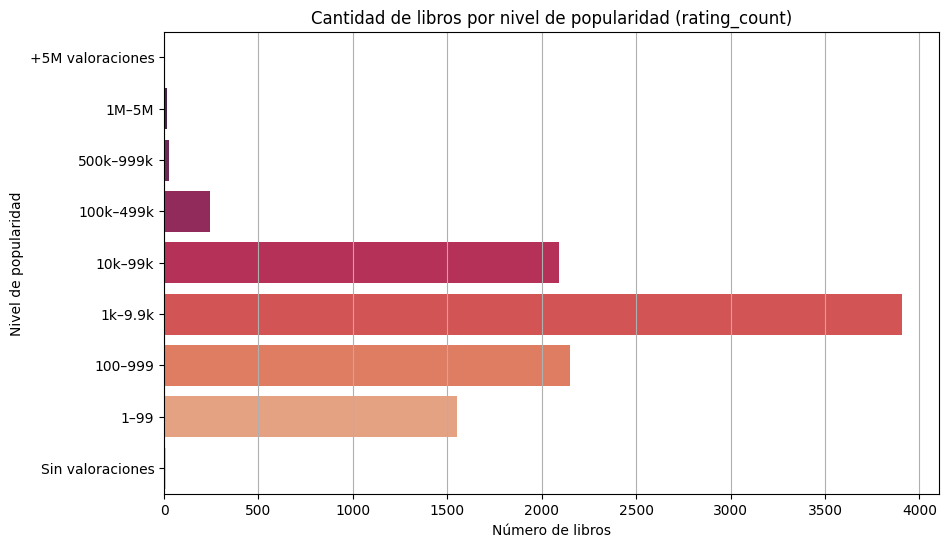

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=bestseller_rating.values, y=bestseller_rating.index, hue=bestseller_rating.index, palette="rocket")
plt.title("Cantidad de libros por nivel de popularidad (rating_count)")
plt.xlabel("Número de libros")
plt.ylabel("Nivel de popularidad")
plt.grid(axis='x')
plt.show()


**`review_count`**

In [24]:
top_review = libros.sort_values(by="review_count", ascending=False)[["title", "author", "review_count"]].head(10)
top_review

,title,author,review_count
1776,The Fault in Our Stars,John Green,154147
6423,The Girl on the Train,Paula Hawkins,108895
976,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Olly Moss",108483
8928,Wonder,"R.J. Palacio, Raquel Jaramillo",64971
9766,Pride and Prejudice,"Jane Austen, Anna Quindlen",64061
3053,Harry Potter and the Cursed Child: Parts One a...,"John Tiffany, Jack Thorne, J.K. Rowling",63912
5804,Harry Potter and the Deathly Hallows,J.K. Rowling,63495
6898,Looking for Alaska,John Green,55284
7512,Animal Farm,"George Orwell, Russell Baker, C.M. Woodhouse",53251
1911,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling, Mary GrandPrÃ©",53061


In [25]:
# Creamos categorías por número de valoraciones
def clasificar_popularidad_review(x):
    if x >= 100000:
        return "+100k reseñas"
    elif x >= 10000:
        return "10k–99k"
    elif x >= 1000:
        return "1k–9.9k"
    elif x >= 100:
        return "100–999"
    elif x > 0:
        return "1–99"
    else:
        return "Sin reseñas"

libros["popularidad_review"] = libros["review_count"].apply(clasificar_popularidad_review)

# Contamos cuántos libros hay por categoría
bestseller_review = libros["popularidad_review"].value_counts()

#Lista personalizada para el orden de las categorías
orden_popularidad_review = ["+100k reseñas", "10k–99k", "1k–9.9k", "100–999", "1–99", "Sin reseñas"]

# Ordenamos el resultado según el orden personalizado
bestseller_review = bestseller_review[orden_popularidad_review]

print("Distribución por nivel de popularidad (review_count):")
bestseller_review

Distribución por nivel de popularidad (review_count):


,count
popularidad_review,
+100k reseñas,3
10k–99k,167
1k–9.9k,1599
100–999,4098
1–99,3844
Sin reseñas,289


Según esta tabla, podemos observar que  la mayoría de los libros del conjunto de datos tienen un número reducido de reseñas: casi 4.100 libros cuentan con entre 100 y 999 reseñas, y más de 3.800 tienen menos de 100. Por otro lado, solo 3 libros superan las 100.000 reseñas, lo que indica que muy pocos libros alcanzan una popularidad excepcional. Estos tres libros son "*The Fault in Our Stars*", "*The Girl on the Train*" y "*Harry Potter and the Philosopher's Stone*". Esto nos sugiere que existe una fuerte concentración de la atención de los lectores en unos pocos libros muy populares, mientras que la mayoría recibe una visibilidad y participación más limitada por parte de los usuarios. También, se destaca que hay 289 libros no tienen ninguna reseña.

Vamos a visualizar esta distribución

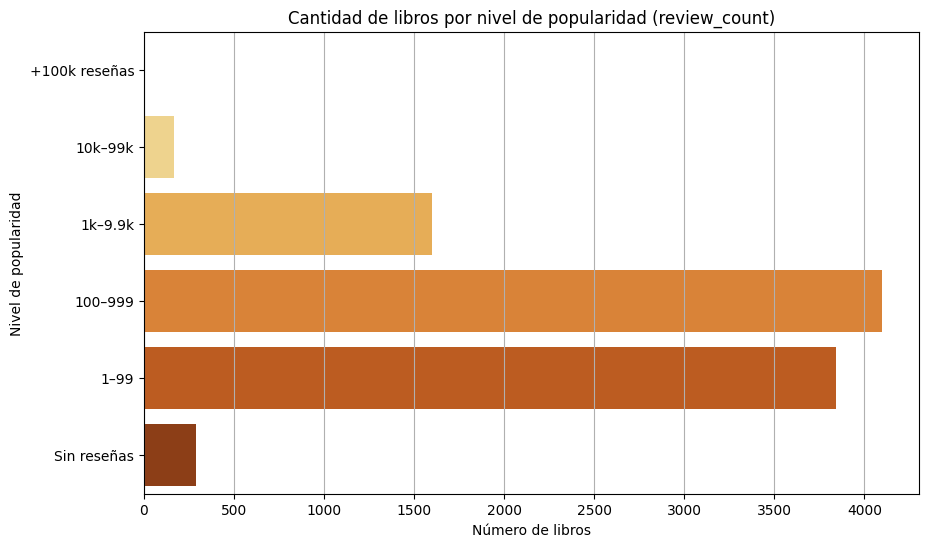

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=bestseller_review.values, y=bestseller_review.index, hue=bestseller_review.index, palette="YlOrBr")
plt.title("Cantidad de libros por nivel de popularidad (review_count)")
plt.xlabel("Número de libros")
plt.ylabel("Nivel de popularidad")
plt.grid(axis='x')
plt.show()

Ahora, vamos a comparar ambas métricas y ver cuántos libros tienen altos valores tanto de valoraciones como de reseñas.

In [27]:
# Contamos cuántos libros hay en cada combinación de grupos
metr_combinado = libros.groupby(["popularidad_rating", "popularidad_review"]).size().reset_index(name="cantidad")

print("Comparación entre rating y review:")
metr_combinado


Comparación entre rating y review:


,popularidad_rating,popularidad_review,cantidad
0,+5M valoraciones,+100k reseñas,1
1,100k–499k,100–999,1
2,100k–499k,10k–99k,104
3,100k–499k,1k–9.9k,137
4,100–999,100–999,227
5,100–999,1–99,1917
6,100–999,Sin reseñas,4
7,10k–99k,100–999,744
8,10k–99k,10k–99k,20
9,10k–99k,1k–9.9k,1319


No está ordenado de manera adecuada la tabla

In [28]:
#Usamos orden que hemos definidos antes
orden_popularidad_review = ["+100k reseñas", "10k–99k", "1k–9.9k", "100–999", "1–99", "Sin reseñas"]
orden_popularidad_rating = ["+5M valoraciones", "1M–5M", "500k–999k", "100k–499k", "10k–99k", "1k–9.9k","100–999","1–99","Sin valoraciones"]
#Convertimos en categorías ordenadas
libros["popularidad_rating"] = pd.Categorical(libros["popularidad_rating"], categories=orden_popularidad_rating, ordered=True)
libros["popularidad_review"] = pd.Categorical(libros["popularidad_review"], categories=orden_popularidad_review, ordered=True)

metr_combinado = libros.groupby(["popularidad_rating", "popularidad_review"]).size().reset_index(name="cantidad")
#Filtamos para eliminar filas con 0
metr_combinado = metr_combinado[metr_combinado["cantidad"]>0]

print("Comparación entre rating y review:")
metr_combinado


Comparación entre rating y review:


/tmp/ipython-input-1016887255.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metr_combinado = libros.groupby(["popularidad_rating", "popularidad_review"]).size().reset_index(name="cantidad")


,popularidad_rating,popularidad_review,cantidad
0,+5M valoraciones,+100k reseñas,1
6,1M–5M,+100k reseñas,2
7,1M–5M,10k–99k,16
13,500k–999k,10k–99k,27
14,500k–999k,1k–9.9k,1
19,100k–499k,10k–99k,104
20,100k–499k,1k–9.9k,137
21,100k–499k,100–999,1
25,10k–99k,10k–99k,20
26,10k–99k,1k–9.9k,1319


A partir de la tabla,podemos observar una clara correlación entre el número de valoraciones y el número de reseñas: los libros con muchas valoraciones tienden también a tener muchas reseñas, aunque estos casos son excepcionales. Solo 1 libro alcanza el nivel más alto en ambas métricas, con más de 5 millones de valoraciones y más de 100.000 reseñas. A estos se suman 2 libros con entre 1 y 5 millones de valoraciones y más de 100.000 reseñas. En conjunto, apenas 3 libros alcanzan simultáneamente los valores más altos en popularidad por ambas vías.

La mayoría de los libros tienden a concentrarse en rangos medios o bajos. Por ejemplo, 3.126 libros tienen entre 1.000 y 9.900 valoraciones y entre 100 y 999 reseñas, mientras que 1.279 libros se sitúan en el nivel más bajo para ambas métricas (entre 1 y 99 valoraciones y reseñas).  Además, existe 13 libros no tienen ni una sola valoración ni reseña.

Vamos a visualizarla

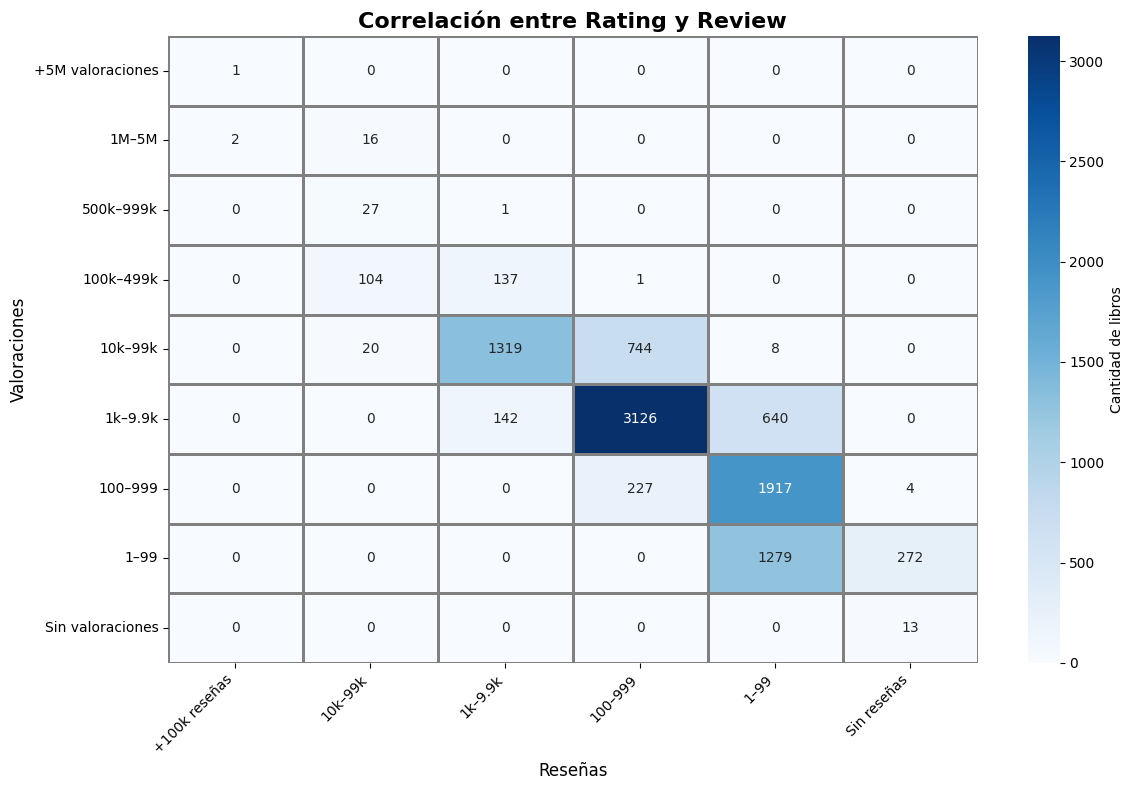

In [29]:
# Usamos el método pivot() para reorganizar y transformar los datos de un DataFrame creando una nueva tabla con un formato diferente
#para la visualización
pivot_metr_combinado = metr_combinado.pivot(index="popularidad_rating", columns="popularidad_review", values="cantidad").fillna(0)

# Creamos heatmap para visualizar
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_metr_combinado, annot=True, fmt=".0f", cmap="Blues", linewidths=1, linecolor="gray", cbar_kws={'label': 'Cantidad de libros'})

plt.title("Correlación entre Rating y Review", fontsize=16, fontweight='bold')
plt.xlabel("Reseñas", fontsize=12)
plt.ylabel("Valoraciones", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostramos la gráfica
plt.tight_layout()
plt.show()


Para las variables:
* `five_star_ratings`
*   `four_star_ratings`
*   `three_star_ratings`
*   `two_star_ratings`
*   `one_star_ratings`

Vamos a sumarlas para comprobar si coinciden con el valor de `rating_count` o no.

In [30]:
libros["suma_estrellas"] = libros[["one_star_ratings", "two_star_ratings", "three_star_ratings",
                           "four_star_ratings", "five_star_ratings"]].sum(axis=1)
#Usamos np.where() para crear condiciones sobre columnas completas.
libros["verificacion_rating"] = np.where(
    libros["suma_estrellas"] == libros["rating_count"],
    "Coincide",
    "No coincide"
)

libros["verificacion_rating"]

,verificacion_rating
0,Coincide
1,Coincide
2,Coincide
3,Coincide
4,Coincide
...,...
9995,Coincide
9996,Coincide
9997,Coincide
9998,Coincide


In [31]:
libros["verificacion_rating"].value_counts()

,count
verificacion_rating,
Coincide,10000


In [32]:
#También podemos bucle if else y usando .all() para comprobar si coincide o no

if (libros["suma_estrellas"] == libros["rating_count"]).all():
    print("La suma de las valoraciones por estrellas coincide con el rating_count para todos los libros.")
else:
    print("La suma de las valoraciones por estrellas no coincide con el rating_count para algunos libros.")

La suma de las valoraciones por estrellas coincide con el rating_count para todos los libros.


Para las variables de tipo cadena, podemos observar que aparecen cadenas con caracteres especiales. Por lo tanto, es necesario recodificarlas o eliminar las filas que contienen dichos caracteres especiales.
*   `title`
*   `author`
*   `publisher`
*   `series`
*   `genre`
*   `awards`



In [33]:
def tiene_caracteres_especiales(texto):
    if pd.isna(texto):
        return False # Ignorar valores nulos
# Buscamos cualquier carácter que no sea ASCII estándar
    return bool(re.search(r"[^\x00-\x7F]", str(texto)))
# Lista de nombres de columnas que contienen datos tipo texto a analizar
var_string = ["title", "author", "publisher", "series", "genre_and_votes", "awards"]

for columna in var_string:
    conteo = libros[columna].apply(tiene_caracteres_especiales).sum() # Aplicamos la función a cada valor de la columna y sumamos los True (es decir, los que contienen caracteres especiales)
    print(f"Columna '{columna}': {conteo} registros con caracteres especiales")

Columna 'title': 693 registros con caracteres especiales
Columna 'author': 767 registros con caracteres especiales
Columna 'publisher': 458 registros con caracteres especiales
Columna 'series': 175 registros con caracteres especiales
Columna 'genre_and_votes': 18 registros con caracteres especiales
Columna 'awards': 230 registros con caracteres especiales


In [34]:
#Vemos los registros que tienen caracteres especiales
problematicos = libros[var_string].map(tiene_caracteres_especiales).any(axis=1)
libros_problematicos = libros[problematicos]
libros_problematicos

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description,popularidad_rating,popularidad_review,suma_estrellas,verificacion_rating
1,9783248,ÎÎ¹ Î­Î¼ÏÎ¿ÏÎ¿Î¹ ÏÏÎ½ ÎµÎ¸Î½ÏÎ½,https://www.goodreads.com//book/show/9783248,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Alexandros Papadiamantis, ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï...",https://www.goodreads.com/author/show/5279499....,224,10,4.09,81,93,42,5,3,391.00,1882,ÎÎ¹Î²Î»Î¹Î¿ÏÏÎ»ÎµÎ¯Î¿Î½ ÏÎ·Ï ÎÏÏÎ¯Î±Ï,ÎÎ¹ Î­Î¼ÏÎ¿ÏÎ¿Î¹ ÏÏÎ½ ÎµÎ¸Î½ÏÎ½,Historical-Historical Fiction 3,960051027X,9789600510270,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"82531, 82531, 53639, 3064278, 7055559, 6327342...",NaN,Î ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï Î Î±ÏÎ±Î´Î¹Î±Î¼Î¬Î½Ï...,100–999,1–99,224,Coincide
33,17213062,Os Anjos de Gabriel,https://www.goodreads.com//book/show/17213062-...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Francisco CorrÃªa,https://www.goodreads.com/author/show/6590827....,5,0,3.60,1,1,3,0,0,NaN,NaN,NaN,NaN,GLBT-Queer 1user,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,NaN,NaN,NaN,NaN,1–99,Sin reseñas,5,Coincide
47,28385,In the Shadow of Young Girls in Flower,https://www.goodreads.com//book/show/28385.In_...,(Ã la recherche du temps perdu #2),https://i.gr-assets.com/images/S/compressed.ph...,"Marcel Proust, James Grieve, Christopher Prend...",https://www.goodreads.com/author/show/233619.M...,10039,812,4.40,5750,2889,1099,224,77,576.00,1913,Penguin Classics,Ã l'ombre des jeunes filles en fleurs,"Classics 358, Fiction 352, Cultural-France 187...",0143039075,9780143039075,NaN,NaN,"Narrator/Marcel, Baron de Charlus, Gilberte Sw...","Prix Goncourt (1919), ÐÑÐµÐ¼ÑÑ Â«Ð¡ÐºÐ¾Ð²Ð...",https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"777380, 777380, 3753149, 852284, 289769, 16171...","12749, 18798, 18799, 865124, 852431, 28405",is Proustâs spectacular dissection of male ...,10k–99k,100–999,10039,Coincide
55,3310284,ÐÐ¾Ð´ Ð¸Ð³Ð¾ÑÐ¾,https://www.goodreads.com//book/show/3310284,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Ivan Vazov, ÐÐ²Ð°Ð½ ÐÐ°Ð·Ð¾Ð²",https://www.goodreads.com/author/show/16877882...,6077,125,4.19,3135,1574,899,319,150,528.00,1893,ÐÐ°Ð¼ÑÐ½ Ð¯ÐºÐ¾Ð²,ÐÐ¾Ð´ Ð¸Ð³Ð¾ÑÐ¾,"European Literature-Bulgarian Literature 110, ...",9545272465,9789545272462,NaN,Bulgaria,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"6251113, 6251113, 2124105, 1864618, 1290902, 2...",NaN,âÐÐ¾Ð´ Ð¸Ð³Ð¾ÑÐ¾â Ðµ Ð¿ÑÑÐ²Ð¸ÑÑ Ð±Ñ...,1k–9.9k,100–999,6077,Coincide
58,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",https://www.goodreads.com//book/show/8.Harry_P...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"J.K. Rowling, Mary GrandPrÃ©",https://www.goodreads.com/author/show/1077326....,47676,176,4.78,40628,5024,1281,306,437,2690.00,October 1st 2003,Scholastic,NaN,"Fantasy 113, Young Adult 43, Fiction 29, Fanta...",0439682584,9780439682589,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"2223324, 2223324, 2283433, 6937741, 25857197, ...",NaN,Box Set containing Harry Potter and the Sorcer...,10k–99k,100–999,47676,Coincide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,6436659,Transition,https://www.goodreads.com//book/show/6436659-t...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Iain M. Banks,https://www.goodreads.com/author/show/5807106....,9169,636,3.86

Para la variable `date_published`, se transformará en `year_published` ya que solo extraemos el año de publicación. Tenemos que verificar que no existan valores negativos, que los años estén correctamente formateados y que no haya valores atípicos.

### **Revisión y reorganización de formatos de datos**

Como mencionamos anteriormente, hay algunas columnas que deben convertirse a otro tipo de datos, variables que necesitamos normalizar o recodificar, y columnas que se puede reorganizar o separar en dos columnas.

### **¿Datos suficientes o necesitamos fuentes adicionales?**

Disponemos de los datos suficientes para realizar nuestro análisis de negocio. Por lo tanto, no es necesario integrar fuentes o datos adicionales.

## **1.2. Conexión de los datos con proceso de negocio**

### **Descripción**

El dataset proporcionado recoge información sobre los 10.000 mejores libros de todos los tiempos, recopilada a través de Goodreads. Estos datos resultan útiles para obtener información acerca de los mejores libros, sus valoraciones, su calidad y popularidad, así como la distribución de dichas valoraciones.

El proceso de negocio que ha generado estos datos corresponde a un análisis de mercado literario, basado en el estudio de los mejores libros publicados y reseñados en Goodreads con el objetivo de medir la popularidad y la recepción de los libros. Esto permite entender mejor las tendencias y preferencias del mercado, y apoyar a los departamentos editoriales, de marketing y ventas en la toma de decisiones estratégicas sobre promoción de autores, reediciones, adquisición de derechos o predicción de tendencias literarias.




### **Tipo de tabla de hecho**

Se trata de una tabla de hechos tipo **snapshot (instantánea)** , ya que cada fila representa el estado de un libro en el momento en que se recopilaron los datos del sitio web de Goodreads. Esta tabla captura un instante específico en el tiempo y refleja la actividad acumulada de los usuarios hasta ese punto. No constituye un registro transaccional de cada evento de calificación, ni describe eventos transaccionales individuales. Los datos no rastrean los cambios a lo largo del tiempo dentro del conjunto de datos. Para analizar tendencias o cómo evoluciona la recepción de un libro, sería necesario contar con varias instantáneas tomadas en diferentes momentos.  

En resumen, cada registro refleja el estado agregado de las métricas del libro en el momento de la extracción de los datos, sin registrar cada transacción individual (como lo sería cada valoración), sino el estado consolidado en ese punto temporal. No se registran cambios históricos, ya que solo se dispone de una única fotografía temporal.

### **Granularidad**

La granularidad en este caso es la más baja, a nivel de libro-snapshot, es decir, cada registro representa un libro en un momento específico en el tiempo, capturando su estado y métricas acumuladas en ese instante.

### **Tasa de refresco**

La tasa de refresco será trimestral para seguir la evolución de las tendencias del mercado.

Para elaborar la tabla de hechos "Análisis_Mercado_Libros", hemos tomado como referencia las variables del dataset. A partir de ellas, hemos definido las medidas y las dimensiones.

### **Medidas**

<table>
  <tr>
    <th>Medida</th>
    <th>Columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Calificación media</td>
    <td>average_rating</td>
    <td>Promedio ponderado de las calificaciones del libro. <br> Es una medida no aditiva (no se suma entre libros) y se calcula sumando todas las calificaciones otorgadas por los usuarios y se divide entre el número total de valoraciones.</td>
  </tr>
  <tr>
    <td>Total de valoraciones</td>
    <td>rating_count</td>
    <td>Número total de calificaciones recibidas por el libro. <br> Es una medida aditiva entre libros (se puede sumar entre títulos si fuera necesario).Se calcula como la suma de todas las valoraciones de 5 a 1 estrellas.  </td>
  </tr>
  <tr>
    <td>Conteo total de reseñas</td>
    <td>review_count</td>
    <td>Número total de reseñas de texto dejadas por los usuarios. Es una medida aditiva. <br> Se obtiene directamente del conteo de reseñas asociadas al libro.</td>
  </tr>
  <tr>
    <td>Valoraciones de 5 estrellas</td>
    <td>five_star_ratings</td>
    <td>Cantidad de valoraciones de 5 estrellas. Es una medida aditiva.</td>
  </tr>
  <tr>
    <td>Valoraciones de 4 estrellas</td>
    <td>four_star_ratings</td>
    <td>Cantidad de valoraciones de 4 estrellas. Es una medida aditiva</td>
  </tr>
  <tr>
    <td>Valoraciones de 3 estrellas</td>
    <td>three_star_ratings</td>
    <td>Cantidad de valoraciones de 3 estrellas. Es una medida aditiva</td>
  </tr>
  <tr>
    <td>Valoraciones de 2 estrellas</td>
    <td>two_star_ratings</td>
    <td>Cantidad de valoraciones de 2 estrellas. Es una medida aditiva</td>
  </tr>
  <tr>
    <td>Valoraciones de 1 estrellas</td>
    <td>one_star_ratings</td>
    <td>Cantidad de valoraciones de 1 estrellas. Es una medida aditiva</td>
  </tr>
</table>

### **Dimensiones**

Se han definido varias dimensiones que agrupan las variables del dataset de acuerdo a su naturaleza y función dentro del modelo.  La dimensión de libros (Dim_Book) recoge todos los datos bibliográficos esenciales que permiten describir y caracterizar cada obra, como el título, la editorial, la serie a la que pertenece y el año de publicación. Además,para gestionar relaciones de tipo multivalor, se han diseñado dimensiones específicas como Dim_Author, Dim_Genre y Dim_Awards, que almacenan respectivamente los autores, los géneros literarios y los premios asociados a los libros. Dado que un libro puede tener múltiples autores, pertenecer a varios géneros y recibir varios premios, se han implementado tablas puente para establecer las relaciones de muchos a muchos entre Dim_Book y cada una de estas dimensiones.

**Dimensión Libro (Dim_Book)**

<img src="https://i.ibb.co/xKJh2k73/1.png" width="500">

**Dimensión Autor (Dim_Author)**

<img src="https://i.ibb.co/35gmbFvd/Dim-Author.png" width="500">

**Dimensión Género (Dim_Genre)**

<img src="https://i.ibb.co/TpHsCwy/Dim-genre.png" width="500">

**Dimensión Premios (Dim_Awards)**

<img src="https://i.ibb.co/YFvTBMJk/Dim-awards.png" width="500">

**Tabla grupo (Dim_Grupo_Author)**

<img src="https://i.ibb.co/KzSB8NfT/5.png" width="500">

**Tabla Puente (Dim_Puente_Author)**

<img src="https://i.ibb.co/CpGdNrBV/6.png" width="500">

**Tabla grupo (Dim_Grupo_Genre)**

<img src="https://i.ibb.co/yMsStg6/7.png" width="500">

**Tabla Puente (Dim_Puente_Genre)**

<img src="https://i.ibb.co/jk0KLnRT/8.png" width="500">

**Tabla grupo (Dim_Grupo_Awards)**

<img src="https://i.ibb.co/YBRsWddn/9.png" width="500">

**Tabla Puente (Dim_Puente_Awards)**

<img src="https://i.ibb.co/TDPCYtBX/10.png" width="500">

### **Hecho**

<img src="https://i.ibb.co/49bmX0t/Captura-de-pantalla-2025-04-29-040442.png" width="300">

### **Tabla de Hechos**

<img src="https://i.ibb.co/HDdYgt9Y/Tabla-hecho.png" width="550">

**SCD** significa que los atributos son lentamente cambiantes. **SCD 1** significa que aplicaremos la técnica de tipo 1, que consiste en reemplazar el valor antiguo por el nuevo. En el caso del género, cada vez que un libro recibe una nueva categorización o se vota nuevamente, simplemente reemplazamos el valor anterior del género sin necesidad de conservar el historial. El objetivo es mostrar el género actual más relevante, no mantener los anteriores. Lo mismo ocurre con los premios: si un libro recibe un premio adicional, no es necesario conservar un historial completo de premios previos. Solo se necesita reflejar el estado actual de los premios recibidos.



Con estos datos  se pueden generar reportes orientados a:
*   Análisis de popularidad y recepción de libros
*   Comportamieneto de valoración de los usuarios
*   Tendencias por género literario
*   Desempeño de autores y editoriales
*   Evolución temporal de la recepción literaria

## **1.3. Limpieza y pre-procesado de los datos**

### **Eliminación de columnas**

Eliminamos las variables previamente mencionadas que no son relevantes, así como las variables creadas para comprobar anomalías.

In [35]:
libros.drop(["id","isbn","isbn13","asin","link","cover_link","author_link",
                      "amazon_redirect_link","worldcat_redirect_link","number_of_pages",
                      "original_title","settings","characters","description","recommended_books",
                      "books_in_series","popularidad_rating","popularidad_review","suma_estrellas",
                      "verificacion_rating"],axis=1, inplace=True)

In [36]:
libros.head()

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,date_published,publisher,genre_and_votes,awards
0,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1",(Fullmetal Alchemist: Omnibus #1),"Hiromu Arakawa, Akira Watanabe",6033,292,4.60,4229,1330,361,62,51,2002,VIZ Media LLC,"Sequential Art-Manga 501, Fantasy 105, Sequent...",NaN
1,ÎÎ¹ Î­Î¼ÏÎ¿ÏÎ¿Î¹ ÏÏÎ½ ÎµÎ¸Î½ÏÎ½,NaN,"Alexandros Papadiamantis, ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï...",224,10,4.09,81,93,42,5,3,1882,ÎÎ¹Î²Î»Î¹Î¿ÏÏÎ»ÎµÎ¯Î¿Î½ ÏÎ·Ï ÎÏÏÎ¯Î±Ï,Historical-Historical Fiction 3,NaN
2,The Return of The Soldier,NaN,"Rebecca West, Sadie Jones",5274,613,3.70,1121,2053,1583,435,82,1918,Virago,"Classics 245, Fiction 234, Historical-Historic...",NaN
3,The Black Unicorn: Poems,NaN,Audre Lorde,1594,122,4.34,845,515,179,43,12,1978,W. W. Norton Company,"Poetry 605, Feminism 60, LGBT 33, Race 17, GLB...",NaN
4,The Innocents Abroad,NaN,"Mark Twain, Grover Gardner",11056,941,3.86,3191,4256,2714,675,220,1869,Modern Library,"Travel 448, Classics 437, Nonfiction 253, Humo...",NaN


### **Manejo valores faltantes**

In [37]:
print(libros.isnull().sum())

title                    0
series                5450
author                   0
rating_count             0
review_count             0
average_rating           0
five_star_ratings        0
four_star_ratings        0
three_star_ratings       0
two_star_ratings         0
one_star_ratings         0
date_published         166
publisher              718
genre_and_votes        532
awards                7980
dtype: int64


In [38]:
libros["series"] = libros["series"].fillna("Standalone")
libros.dropna(subset=["date_published"], inplace=True)
libros["publisher"] = libros["publisher"].fillna("Unknown")
libros["genre_and_votes"] = libros["genre_and_votes"].fillna("No genre 0")
libros["awards"] = libros["awards"].fillna("No awards")
print(libros.isnull().sum())

title                 0
series                0
author                0
rating_count          0
review_count          0
average_rating        0
five_star_ratings     0
four_star_ratings     0
three_star_ratings    0
two_star_ratings      0
one_star_ratings      0
date_published        0
publisher             0
genre_and_votes       0
awards                0
dtype: int64


### **Manejo valores anómalos**

**date_published**

Verificamos si la variable `date_published` tiene valores negativos o outliers como libros antiguos que tienen fecha completa.

In [39]:
fecha_negativo = libros[libros["date_published"].str.contains("-")]
fecha_negativo

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,date_published,publisher,genre_and_votes,awards
139,Iphigenia in Aulis,Standalone,"Euripides, Nicholas Rudall",3477,107,4.03,1294,1204,791,165,23,-405,Ivan R. Dee Publisher,"Plays 164, Classics 123, Drama 61, Fantasy-Myt...",No awards
325,The Conquest of Gaul,Standalone,"Gaius Julius Caesar, S.A. Handford, Jane F. Ga...",8534,408,4.00,2978,3145,1905,420,86,-50,Penguin Classics,"History 763, Classics 282, Nonfiction 202, His...",No awards
565,Metaphysics,Standalone,"Aristotle, Joe Sachs",12954,184,4.04,5325,3984,2742,678,225,-330,Green Lion Press,"Philosophy 1165, Classics 157, Nonfiction 130,...",No awards
569,The Nature of Things,Standalone,"Lucretius, A.E. Stallings, Richard Jenkyns",11149,519,3.98,4325,3485,2365,723,251,-55,Penguin Books Ltd,"Philosophy 898, Poetry 386, Classics 381, Nonf...",National Book Award Finalist for Translation (...
2873,"The Trial and Death of Socrates (Euthyphro, Ap...",(Great Books in Philosophy),"Plato, G.M.A. Grube, John M. Cooper",33842,924,4.09,13665,11895,6392,1410,480,-400,Hackett Publishing Company,"Philosophy 2012, Classics 622, Nonfiction 367,...",No awards
3932,The Bhagavad Gita,Standalone,"Anonymous, Simon Brodbeck, Juan MascarÃ³",53103,1898,4.13,25084,15018,9224,2518,1259,-400,Penguin,"Religion 1077, Philosophy 843, Classics 618, S...",No awards
4748,The Iliad,Standalone,"Homer, Robert Fagles, Bernard Knox",343915,6916,3.86,114340,112354,82982,24868,9371,-750,Penguin Classics,"Classics 11404, Poetry 3746, Fiction 2927, Fan...",No awards
6297,The Complete Plays,Standalone,"Aristophanes, Moses Hadas",2291,69,4.21,1127,668,378,89,29,-388,Bantam Classics,"Classics 107, Plays 78, Drama 47, Fiction 30, ...",No awards
6420,Medea,Standalone,"Euripides, Rex Warner",53576,1615,3.88,16626,18888,13693,3541,828,-431,Dover Publications,"Classics 1938, Plays 1629, Drama 556, Fiction ...",No awards
6907,Psalms,(Bible #19),Anonymous,863,108,4.54,624,131,67,28,13,-1000,Unknown,"Religion 30, Poetry 26, Christian 20, Nonficti...",No awards


In [40]:
len(fecha_negativo)

20

Existe 20 registros que tienen valores negativos

Eliminamos los valores negativos.

In [41]:
#Excluimos los registros donde "date_published" contiene un "-"
libros = libros[~libros["date_published"].str.contains("-")]
libros

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,date_published,publisher,genre_and_votes,awards
0,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1",(Fullmetal Alchemist: Omnibus #1),"Hiromu Arakawa, Akira Watanabe",6033,292,4.60,4229,1330,361,62,51,2002,VIZ Media LLC,"Sequential Art-Manga 501, Fantasy 105, Sequent...",No awards
1,ÎÎ¹ Î­Î¼ÏÎ¿ÏÎ¿Î¹ ÏÏÎ½ ÎµÎ¸Î½ÏÎ½,Standalone,"Alexandros Papadiamantis, ÎÎ»Î­Î¾Î±Î½Î´ÏÎ¿Ï...",224,10,4.09,81,93,42,5,3,1882,ÎÎ¹Î²Î»Î¹Î¿ÏÏÎ»ÎµÎ¯Î¿Î½ ÏÎ·Ï ÎÏÏÎ¯Î±Ï,Historical-Historical Fiction 3,No awards
2,The Return of The Soldier,Standalone,"Rebecca West, Sadie Jones",5274,613,3.70,1121,2053,1583,435,82,1918,Virago,"Classics 245, Fiction 234, Historical-Historic...",No awards
3,The Black Unicorn: Poems,Standalone,Audre Lorde,1594,122,4.34,845,515,179,43,12,1978,W. W. Norton Company,"Poetry 605, Feminism 60, LGBT 33, Race 17, GLB...",No awards
4,The Innocents Abroad,Standalone,"Mark Twain, Grover Gardner",11056,941,3.86,3191,4256,2714,675,220,1869,Modern Library,"Travel 448, Classics 437, Nonfiction 253, Humo...",No awards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Beautiful Broken Rules,(Broken #1),Kimberly Lauren,31682,1967,4.13,13482,11285,4960,1373,582,May 13th 2013,Montlake Romance,"New Adult 556, Romance 464, Academic-College 2...",No awards
9995,Genius: The Life and Science of Richard Feynman,Standalone,"James Gleick, Richard P. Feynman",19956,459,4.15,8816,7067,2875,715,483,September 29th 1992,Vintage,"Biography 730, Science 669, Nonfiction 339, Sc...",Pulitzer Prize Nominee for Biography or Autobi...
9996,The Diary of a Bookseller,Standalone,Shaun Bythell,13618,2464,3.79,3327,5520,3621,892,258,September 28th 2017,Profile Books,"Nonfiction 854, Writing-Books About Books 311,...",No awards
9998,Two Little Girls in Blue,Standalone,Mary Higgins Clark,25631,1433,3.86,7574,9081,7058,1584,334,2006,Pocket Books,"Mystery 499, Fiction 187, Suspense 128, Thrill...",No awards


Para poder manjerar valores anómalos de `date_published` es mejor cambiar el tipo de datos y así creamos la columna `year_published`.

In [42]:
# Extraemos año entre 1000 y 2029 desde el texto de "date_published"
libros["year_published"] = libros["date_published"].str.extract(r"(1[0-9]{3}|20[0-2][0-9])")[0]
#Convertimos a número
libros["year_published"] = pd.to_numeric(libros["year_published"])
libros["year_published"]

/tmp/ipython-input-81724049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["year_published"] = libros["date_published"].str.extract(r"(1[0-9]{3}|20[0-2][0-9])")[0]
/tmp/ipython-input-81724049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["year_published"] = pd.to_numeric(libros["year_published"])


,year_published
0,2002.00
1,1882.00
2,1918.00
3,1978.00
4,1869.00
...,...
9994,2013.00
9995,1992.00
9996,2017.00
9998,2006.00


Observamos que, en lugar de ser un valor entero, es un valor float, lo cual se debe a que existen valores faltantes en la columna `year_published`. Esto podría ocurrir en el caso de libros antiguos que fueron publicados antes del año 1000.

Verificamos si los valores nulos corresponden a libros antiguos y si contienen valores anómalos.

In [43]:
libros_anomalos = libros[libros["year_published"].isna()]
libros_anomalos[["title", "author", "date_published","year_published"]]

,title,author,date_published,year_published
1487,Golden Stories of Umar Ibn Al-Khatab,"Abdul Malik Mujahid, Darussalam",January 1st 12,NaN
1549,ÙØ±Ø¢Ù Ú©Ø±ÛÙ,"Anonymous, Ø¹ÙÛ Ù ÙØ³ÙÛ Ú¯Ø±Ù Ø§Ø±ÙØ¯Û",650,NaN
1976,The Diamond Sutra,Anonymous,868,NaN
2371,ÙØ±Ø¢Ù,"Anonymous, Ø­Ø³ÛÙ Ù Ø­ÛâØ§ÙØ¯ÛÙ Ø§ÙÙ...",650,NaN
3481,Confessions,"Augustine of Hippo, Henry Chadwick, Albert Coo...",400,NaN
4349,Daphnis and Chloe,"Longus, Paul Turner",150,NaN
4673,The Golden Ass,"Apuleius, Jack Lindsay, Claudio Annaratone",170,NaN
5471,Theological Tractates/The Consolation of Philo...,"Boethius, H.F. Stewart, E.K. Rand, S.J. Tester",524,NaN
5729,Medea,"Seneca, Frederick Ahl",50,NaN
5782,Asleep with One Eye Open,Dale S. Ailes,January 1st 203,NaN


In [44]:
len(libros)

9814

In [45]:
len(libros_anomalos)

16

In [46]:
libros_anomalos.drop([1487, 5782, 7328, 8253, 8813], inplace=True)

/tmp/ipython-input-1330257864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros_anomalos.drop([1487, 5782, 7328, 8253, 8813], inplace=True)


In [47]:
len(libros_anomalos)

11

Los valores nulos parecen corresponder a libros muy antiguos. Sin embargo, algunos registros son verdaderamente anómalos, como aquellos que presentan una fecha completa. También, está el caso del libro Plutarch's Lives: Volume II, que, por su título, difícilmente podría haber sido escrito por Plutarch. Por lo tanto, decidimos eliminar esos registros.

In [48]:
libros_anomalos[["title", "author", "date_published","year_published"]]

,title,author,date_published,year_published
1549,ÙØ±Ø¢Ù Ú©Ø±ÛÙ,"Anonymous, Ø¹ÙÛ Ù ÙØ³ÙÛ Ú¯Ø±Ù Ø§Ø±ÙØ¯Û",650,NaN
1976,The Diamond Sutra,Anonymous,868,NaN
2371,ÙØ±Ø¢Ù,"Anonymous, Ø­Ø³ÛÙ Ù Ø­ÛâØ§ÙØ¯ÛÙ Ø§ÙÙ...",650,NaN
3481,Confessions,"Augustine of Hippo, Henry Chadwick, Albert Coo...",400,NaN
4349,Daphnis and Chloe,"Longus, Paul Turner",150,NaN
4673,The Golden Ass,"Apuleius, Jack Lindsay, Claudio Annaratone",170,NaN
5471,Theological Tractates/The Consolation of Philo...,"Boethius, H.F. Stewart, E.K. Rand, S.J. Tester",524,NaN
5729,Medea,"Seneca, Frederick Ahl",50,NaN
7080,Letters from a Stoic,"Seneca, Robin Campbell",64,NaN
9345,The Twelve Caesars,"Suetonius, Michael Grant, Robert Graves",121,NaN


In [49]:
libros.drop([1487, 5782, 7328, 8253, 8813], inplace=True)

/tmp/ipython-input-4102098696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros.drop([1487, 5782, 7328, 8253, 8813], inplace=True)


In [50]:
len(libros)

9809

Sustituimos manualmente usando *loc*

In [51]:
libros.loc[1549, "year_published"] = 650
libros.loc[1976, "year_published"] = 868
libros.loc[2371, "year_published"] = 650
libros.loc[3481, "year_published"] = 400
libros.loc[4349, "year_published"] = 150
libros.loc[4673, "year_published"] = 170
libros.loc[5471, "year_published"] = 524
libros.loc[5729, "year_published"] = 50
libros.loc[7080, "year_published"] = 64
libros.loc[9345, "year_published"] = 121
libros.loc[9462, "year_published"] = 393

In [52]:
libros[libros["year_published"].isnull()]

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,date_published,publisher,genre_and_votes,awards,year_published


Ya no hay valores nulos.

### **Normalización de los datos**

Tenemos que recodificar las variables de tipo string porque tienen caracteres especiales. Las variables con caracteres especiales son  `title`, `author`, `series`, `publisher`, `genre_and_votes`, `awards`.

In [53]:
columnas_string = ["title", "author", "publisher", "series", "genre_and_votes", "awards"]

def recodificar(texto):
    if pd.isna(texto):
        return texto
    try:
        return texto.encode("latin-1").decode("utf-8")
    except (UnicodeEncodeError, UnicodeDecodeError):
        return texto

for columna in columnas_string:
    libros[columna] = libros[columna].apply(recodificar)


/tmp/ipython-input-2808340788.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros[columna] = libros[columna].apply(recodificar)


Tras verificar el dataframe, todovía existe registro con caracteres especiales porque hay que ser recodificado otra vez, así que usamos librería *ftfy* para manejar los registros con caracteres especiales no detectados.

In [54]:
!pip install ftfy
from ftfy import fix_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00


In [55]:
def recodificar_lib(texto):
    if pd.isna(texto):
        return texto
    return fix_text(texto, normalization="NFKC")

for columna in columnas_string:
    libros[columna] = libros[columna].apply(recodificar_lib)

/tmp/ipython-input-4111359180.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros[columna] = libros[columna].apply(recodificar_lib)


In [56]:
libros

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,date_published,publisher,genre_and_votes,awards,year_published
0,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1",(Fullmetal Alchemist: Omnibus #1),"Hiromu Arakawa, Akira Watanabe",6033,292,4.60,4229,1330,361,62,51,2002,VIZ Media LLC,"Sequential Art-Manga 501, Fantasy 105, Sequent...",No awards,2002.00
1,Οι έμποροι των εθνών,Standalone,"Alexandros Papadiamantis, Αλέξανδρος Παπαδιαμά...",224,10,4.09,81,93,42,5,3,1882,Βιβλιοπωλείον της Εστίας,Historical-Historical Fiction 3,No awards,1882.00
2,The Return of The Soldier,Standalone,"Rebecca West, Sadie Jones",5274,613,3.70,1121,2053,1583,435,82,1918,Virago,"Classics 245, Fiction 234, Historical-Historic...",No awards,1918.00
3,The Black Unicorn: Poems,Standalone,Audre Lorde,1594,122,4.34,845,515,179,43,12,1978,W. W. Norton Company,"Poetry 605, Feminism 60, LGBT 33, Race 17, GLB...",No awards,1978.00
4,The Innocents Abroad,Standalone,"Mark Twain, Grover Gardner",11056,941,3.86,3191,4256,2714,675,220,1869,Modern Library,"Travel 448, Classics 437, Nonfiction 253, Humo...",No awards,1869.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Beautiful Broken Rules,(Broken #1),Kimberly Lauren,31682,1967,4.13,13482,11285,4960,1373,582,May 13th 2013,Montlake Romance,"New Adult 556, Romance 464, Academic-College 2...",No awards,2013.00
9995,Genius: The Life and Science of Richard Feynman,Standalone,"James Gleick, Richard P. Feynman",19956,459,4.15,8816,7067,2875,715,483,September 29th 1992,Vintage,"Biography 730, Science 669, Nonfiction 339, Sc...",Pulitzer Prize Nominee for Biography or Autobi...,1992.00
9996,The Diary of a Bookseller,Standalone,Shaun Bythell,13618,2464,3.79,3327,5520,3621,892,258,September 28th 2017,Profile Books,"Nonfiction 854, Writing-Books About Books 311,...",No awards,2017.00
9998,Two Little Girls in Blue,Standalone,Mary Higgins Clark,25631,1433,3.86,7574,9081,7058,1584,334,2006,Pocket Books,"Mystery 499, Fiction 187, Suspense 128, Thrill...",No awards,2006.00


### **Conversión de tipos de datos**

Convertimos `year_published` a tipo *int* y separamos la columna `genre_and_votes` en dos columnas: `genre`, de tipo *category*, y `votes`, de tipo *int*. Y transformamos la columna `author` en lista de autores y la columna `awards` en lista de premios.

In [57]:
libros.dtypes

,0
title,object
series,object
author,object
rating_count,int64
review_count,int64
average_rating,float64
five_star_ratings,int64
four_star_ratings,int64
three_star_ratings,int64
two_star_ratings,int64


**author**

In [58]:
# Limpiamos los datos
libros["author"] = libros["author"].str.strip()
#Usamos str.split que devuelve una lista para convertir la columna "author" en una lista, separando los valores por coma
libros["author"] = libros["author"].str.split(",")

/tmp/ipython-input-573789580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["author"] = libros["author"].str.strip()
/tmp/ipython-input-573789580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["author"] = libros["author"].str.split(",")


In [59]:
libros["author"].head()

,author
0,"[Hiromu Arakawa, Akira Watanabe]"
1,"[Alexandros Papadiamantis, Αλέξανδρος Παπαδια..."
2,"[Rebecca West, Sadie Jones]"
3,[Audre Lorde]
4,"[Mark Twain, Grover Gardner]"


**date_published --> year_published**

La mayoría operación ya ha sido procesado en el apartado anterior, pero falta el último paso, cambiar al formato *int* y eliminar la columna `date_published`

In [60]:
libros["year_published"] = libros["year_published"].astype(int)

/tmp/ipython-input-2848348472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["year_published"] = libros["year_published"].astype(int)


In [61]:
libros.drop(columns=["date_published"], inplace=True)

/tmp/ipython-input-4249172608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros.drop(columns=["date_published"], inplace=True)


In [62]:
libros

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,publisher,genre_and_votes,awards,year_published
0,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1",(Fullmetal Alchemist: Omnibus #1),"[Hiromu Arakawa, Akira Watanabe]",6033,292,4.60,4229,1330,361,62,51,VIZ Media LLC,"Sequential Art-Manga 501, Fantasy 105, Sequent...",No awards,2002
1,Οι έμποροι των εθνών,Standalone,"[Alexandros Papadiamantis, Αλέξανδρος Παπαδια...",224,10,4.09,81,93,42,5,3,Βιβλιοπωλείον της Εστίας,Historical-Historical Fiction 3,No awards,1882
2,The Return of The Soldier,Standalone,"[Rebecca West, Sadie Jones]",5274,613,3.70,1121,2053,1583,435,82,Virago,"Classics 245, Fiction 234, Historical-Historic...",No awards,1918
3,The Black Unicorn: Poems,Standalone,[Audre Lorde],1594,122,4.34,845,515,179,43,12,W. W. Norton Company,"Poetry 605, Feminism 60, LGBT 33, Race 17, GLB...",No awards,1978
4,The Innocents Abroad,Standalone,"[Mark Twain, Grover Gardner]",11056,941,3.86,3191,4256,2714,675,220,Modern Library,"Travel 448, Classics 437, Nonfiction 253, Humo...",No awards,1869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Beautiful Broken Rules,(Broken #1),[Kimberly Lauren],31682,1967,4.13,13482,11285,4960,1373,582,Montlake Romance,"New Adult 556, Romance 464, Academic-College 2...",No awards,2013
9995,Genius: The Life and Science of Richard Feynman,Standalone,"[James Gleick, Richard P. Feynman]",19956,459,4.15,8816,7067,2875,715,483,Vintage,"Biography 730, Science 669, Nonfiction 339, Sc...",Pulitzer Prize Nominee for Biography or Autobi...,1992
9996,The Diary of a Bookseller,Standalone,[Shaun Bythell],13618,2464,3.79,3327,5520,3621,892,258,Profile Books,"Nonfiction 854, Writing-Books About Books 311,...",No awards,2017
9998,Two Little Girls in Blue,Standalone,[Mary Higgins Clark],25631,1433,3.86,7574,9081,7058,1584,334,Pocket Books,"Mystery 499, Fiction 187, Suspense 128, Thrill...",No awards,2006


**genre_and_votes**

In [63]:
def separar_genero_y_votos(valor):
  genres_votes = valor.split(",")
  generos = []
  votos = []
  for genre_vote in genres_votes:
    genre_vote = genre_vote.strip()
    match = re.match(r"(.+?)\s+(\d+)$", genre_vote)
    if match:
        generos.append(match.group(1))
        votos.append(int(match.group(2)))
  return pd.Series([generos, votos])

libros[["genre", "votes"]] = libros["genre_and_votes"].apply(separar_genero_y_votos)

/tmp/ipython-input-3223807291.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros[["genre", "votes"]] = libros["genre_and_votes"].apply(separar_genero_y_votos)
/tmp/ipython-input-3223807291.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros[["genre", "votes"]] = libros["genre_and_votes"].apply(separar_genero_y_votos)


In [64]:
libros["votes"]

,votes
0,"[501, 105, 69, 43]"
1,[3]
2,"[245, 234, 108, 94, 69]"
3,"[605, 60, 33, 17, 17, 15]"
4,"[448, 437, 253, 161]"
...,...
9994,"[556, 464, 290, 162, 134]"
9995,"[730, 669, 339, 189, 119]"
9996,"[854, 311, 228, 128, 81]"
9998,"[499, 187, 128, 100, 70, 66, 37, 21, 20, 17]"


In [65]:
libros[libros["votes"].apply(lambda x: not x or x == [""])]

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,publisher,genre_and_votes,awards,year_published,genre,votes
40,"Life of St. Rita of Cascia, O.S.A.",Standalone,[Richard Connolly],1,0,4.00,0,1,0,0,0,CreateSpace Independent Publishing Platform,"Womens 1user, Christianity-Catholic 1user, Bio...",No awards,2016,[],[]
61,Northern Travel: Summer and Winter Pictures Of...,Standalone,"[Bayard Taylor, Mathias Larsen]",13,1,4.15,6,4,2,1,0,Createspace Independent Publishing Platform,Autobiography-Memoir 1user,No awards,2006,[],[]
98,Kaguya Hime: A Tale of the Bamboo Cutter,Standalone,"[Melissa Mahinay, Melissa M. Futrell]",11,0,4.00,7,1,1,0,2,Createspace,"Literature-Asian Literature 1user, Childrens 1...",No awards,2012,[],[]
100,"Reader's Digest Condensed Books, 1993 #1, Volu...",Standalone,"[Reader's Digest Association, James Herriot, ...",11,1,3.55,3,4,2,0,2,The Reader's Digest Association,Anthologies 1user,No awards,1993,[],[]
167,Merry-Go-Round and Other Words,Standalone,"[Bryn Fortey, Johnny Mains]",6,1,4.33,4,1,0,1,0,Alchemy Press,"Horror 1user, Poetry 1user, Fiction 1user",No awards,2014,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,Hunt for the Star,(The Eldon Archives #1),[Dane Richter],47,24,4.81,38,9,0,0,0,Unknown,Fantasy 1user,No awards,2013,[],[]
9940,A World Named Utopia: Will He Be Able to Save ...,Standalone,[Subhajit Ganguly],7,4,4.29,4,1,2,0,0,Createspace Independent Publishing Platform,Fiction 1user,No awards,2013,[],[]
9942,Strike of Lightning,Standalone,[M.F.C. Assoum],26,17,4.65,21,3,1,0,1,Averroes Publishing House,"Thriller 1user, Fantasy 1user, Young Adult 1us...",No awards,2015,[],[]
9969,Four Corners,Standalone,[Debra Bloomfield],5,0,4.40,4,0,0,1,0,University of New Mexico Press,"Art-Photography 1user, Art 1user",No awards,2004,[],[]


In [66]:
libros["genre_and_votes"] = libros["genre_and_votes"].str.replace("1user", "1")

/tmp/ipython-input-797193705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["genre_and_votes"] = libros["genre_and_votes"].str.replace("1user", "1")


In [67]:
libros[["genre", "votes"]] = libros["genre_and_votes"].apply(separar_genero_y_votos)

/tmp/ipython-input-475706151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros[["genre", "votes"]] = libros["genre_and_votes"].apply(separar_genero_y_votos)


In [68]:
libros[libros["votes"].apply(lambda x: not x or x == [""])]

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,publisher,genre_and_votes,awards,year_published,genre,votes
3365,If I Told You I was Lying - Would you Believe me!,Standalone,[Martin Gover],4,2,5.00,4,0,0,0,0,amazon digital services,Self Help -1,No awards,2013,[],[]


In [69]:
libros.drop(index=3365, inplace=True)

/tmp/ipython-input-4198518075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros.drop(index=3365, inplace=True)


In [70]:
libros[libros["votes"].apply(lambda x: not x or x == [""])]

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,publisher,genre_and_votes,awards,year_published,genre,votes


In [71]:
libros["genre"]

,genre
0,"[Sequential Art-Manga, Fantasy, Sequential Art..."
1,[Historical-Historical Fiction]
2,"[Classics, Fiction, Historical-Historical Fict..."
3,"[Poetry, Feminism, LGBT, Race, GLBT-Queer, Cul..."
4,"[Travel, Classics, Nonfiction, Humor]"
...,...
9994,"[New Adult, Romance, Academic-College, Contemp..."
9995,"[Biography, Science, Nonfiction, Science-Physi..."
9996,"[Nonfiction, Writing-Books About Books, Autobi..."
9998,"[Mystery, Fiction, Suspense, Thriller, Mystery..."


In [72]:
libros[libros["genre"].apply(lambda x: not x or x == [""])]

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,publisher,genre_and_votes,awards,year_published,genre,votes


In [73]:
libros.drop(columns=["genre_and_votes"], inplace=True)

/tmp/ipython-input-3969056760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros.drop(columns=["genre_and_votes"], inplace=True)


In [74]:
libros

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,publisher,awards,year_published,genre,votes
0,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1",(Fullmetal Alchemist: Omnibus #1),"[Hiromu Arakawa, Akira Watanabe]",6033,292,4.60,4229,1330,361,62,51,VIZ Media LLC,No awards,2002,"[Sequential Art-Manga, Fantasy, Sequential Art...","[501, 105, 69, 43]"
1,Οι έμποροι των εθνών,Standalone,"[Alexandros Papadiamantis, Αλέξανδρος Παπαδια...",224,10,4.09,81,93,42,5,3,Βιβλιοπωλείον της Εστίας,No awards,1882,[Historical-Historical Fiction],[3]
2,The Return of The Soldier,Standalone,"[Rebecca West, Sadie Jones]",5274,613,3.70,1121,2053,1583,435,82,Virago,No awards,1918,"[Classics, Fiction, Historical-Historical Fict...","[245, 234, 108, 94, 69]"
3,The Black Unicorn: Poems,Standalone,[Audre Lorde],1594,122,4.34,845,515,179,43,12,W. W. Norton Company,No awards,1978,"[Poetry, Feminism, LGBT, Race, GLBT-Queer, Cul...","[605, 60, 33, 17, 17, 15]"
4,The Innocents Abroad,Standalone,"[Mark Twain, Grover Gardner]",11056,941,3.86,3191,4256,2714,675,220,Modern Library,No awards,1869,"[Travel, Classics, Nonfiction, Humor]","[448, 437, 253, 161]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Beautiful Broken Rules,(Broken #1),[Kimberly Lauren],31682,1967,4.13,13482,11285,4960,1373,582,Montlake Romance,No awards,2013,"[New Adult, Romance, Academic-College, Contemp...","[556, 464, 290, 162, 134]"
9995,Genius: The Life and Science of Richard Feynman,Standalone,"[James Gleick, Richard P. Feynman]",19956,459,4.15,8816,7067,2875,715,483,Vintage,Pulitzer Prize Nominee for Biography or Autobi...,1992,"[Biography, Science, Nonfiction, Science-Physi...","[730, 669, 339, 189, 119]"
9996,The Diary of a Bookseller,Standalone,[Shaun Bythell],13618,2464,3.79,3327,5520,3621,892,258,Profile Books,No awards,2017,"[Nonfiction, Writing-Books About Books, Autobi...","[854, 311, 228, 128, 81]"
9998,Two Little Girls in Blue,Standalone,[Mary Higgins Clark],25631,1433,3.86,7574,9081,7058,1584,334,Pocket Books,No awards,2006,"[Mystery, Fiction, Suspense, Thriller, Mystery...","[499, 187, 128, 100, 70, 66, 37, 21, 20, 17]"


**awards**

In [75]:
libros["awards"]

,awards
0,No awards
1,No awards
2,No awards
3,No awards
4,No awards
...,...
9994,No awards
9995,Pulitzer Prize Nominee for Biography or Autobi...
9996,No awards
9998,No awards


In [76]:
libros["awards"] = libros["awards"].str.strip()
libros["awards"] = libros["awards"].str.split(",")
libros["awards"]

/tmp/ipython-input-2580967586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["awards"] = libros["awards"].str.strip()
/tmp/ipython-input-2580967586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros["awards"] = libros["awards"].str.split(",")


,awards
0,[No awards]
1,[No awards]
2,[No awards]
3,[No awards]
4,[No awards]
...,...
9994,[No awards]
9995,[Pulitzer Prize Nominee for Biography or Autob...
9996,[No awards]
9998,[No awards]


Ordenamos las columnas de dataframe

In [77]:
libros = libros[[
    "title", "author", "series", "publisher", "year_published",
    "genre", "votes", "awards",
    "average_rating", "rating_count", "review_count",
    "five_star_ratings", "four_star_ratings", "three_star_ratings",
    "two_star_ratings", "one_star_ratings"
]]
libros

,title,author,series,publisher,year_published,genre,votes,awards,average_rating,rating_count,review_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
0,"Fullmetal Alchemist (3-in-1 Edition), Vol. 1","[Hiromu Arakawa, Akira Watanabe]",(Fullmetal Alchemist: Omnibus #1),VIZ Media LLC,2002,"[Sequential Art-Manga, Fantasy, Sequential Art...","[501, 105, 69, 43]",[No awards],4.60,6033,292,4229,1330,361,62,51
1,Οι έμποροι των εθνών,"[Alexandros Papadiamantis, Αλέξανδρος Παπαδια...",Standalone,Βιβλιοπωλείον της Εστίας,1882,[Historical-Historical Fiction],[3],[No awards],4.09,224,10,81,93,42,5,3
2,The Return of The Soldier,"[Rebecca West, Sadie Jones]",Standalone,Virago,1918,"[Classics, Fiction, Historical-Historical Fict...","[245, 234, 108, 94, 69]",[No awards],3.70,5274,613,1121,2053,1583,435,82
3,The Black Unicorn: Poems,[Audre Lorde],Standalone,W. W. Norton Company,1978,"[Poetry, Feminism, LGBT, Race, GLBT-Queer, Cul...","[605, 60, 33, 17, 17, 15]",[No awards],4.34,1594,122,845,515,179,43,12
4,The Innocents Abroad,"[Mark Twain, Grover Gardner]",Standalone,Modern Library,1869,"[Travel, Classics, Nonfiction, Humor]","[448, 437, 253, 161]",[No awards],3.86,11056,941,3191,4256,2714,675,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Beautiful Broken Rules,[Kimberly Lauren],(Broken #1),Montlake Romance,2013,"[New Adult, Romance, Academic-College, Contemp...","[556, 464, 290, 162, 134]",[No awards],4.13,31682,1967,13482,11285,4960,1373,582
9995,Genius: The Life and Science of Richard Feynman,"[James Gleick, Richard P. Feynman]",Standalone,Vintage,1992,"[Biography, Science, Nonfiction, Science-Physi...","[730, 669, 339, 189, 119]",[Pulitzer Prize Nominee for Biography or Autob...,4.15,19956,459,8816,7067,2875,715,483
9996,The Diary of a Bookseller,[Shaun Bythell],Standalone,Profile Books,2017,"[Nonfiction, Writing-Books About Books, Autobi...","[854, 311, 228, 128, 81]",[No awards],3.79,13618,2464,3327,5520,3621,892,258
9998,Two Little Girls in Blue,[Mary Higgins Clark],Standalone,Pocket Books,2006,"[Mystery, Fiction, Suspense, Thriller, Mystery...","[499, 187, 128, 100, 70, 66, 37, 21, 20, 17]",[No awards],3.86,25631,1433,7574,9081,7058,1584,334


Exportamos el dataset para poder realizar el reporte y el cuadro de mando

In [78]:
libros.to_csv("libros.csv", index=False)

## **2. Cuadro de mando**

* **Usuario final**: Responsable del departamento de Marketing
* **Propósito**: Facilita la identificación de libros con alto potencial comercial, géneros preferidos y autores prometedores. Esto permite optimizar campañas, reducir riesgos en inversiones promocionales y anticiparse a las tendencias del mercado.
* **Frecuencia**: Actualización trimestral (push) con alertas adicionales si se detectan cambios significativos. También disponible bajo demanda (pull) para consultas específicas.
* **Adopción**: Se integrará como herramienta clave en la planificación de campañas, apoyando decisiones estratégicas.

<img src="https://i.ibb.co/Gh45PZk/Cuadro-de-mando1.png">

<img src="https://i.ibb.co/CsQjzXw7/Cuadro-de-mando2.png">

<img src="https://i.ibb.co/VWCPD0X7/Cuadro-de-mando3.png">

<img src="https://i.ibb.co/Z6BvSyVb/Cuadro-de-mando4.png">

<img src="https://i.ibb.co/vxMCQxvn/Cuadro-de-mando5.png">

<img src="https://i.ibb.co/dYGpqj1/Cuadro-de-mand6.png">